# Directional Armoring Refactored IT & Quality

In [1]:
# set up required libraries for this analysis
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
import os
import numpy as np

In [2]:
path = '/Users/mflaxman/Dropbox/fbhcp/Research/armoring/'
report_path = '/Users/mflaxman/Dropbox/fbhcp/reports/'
gpath = '/Users/mflaxman/Dropbox/fbhcp/it/'

These impact tables lack geographic attributes, so join them

In [3]:
rzones_file = '/Users/mflaxman/Dropbox/fbhcp/Research/beach_management/management_protection_by_rzone_w_regions.shp'
rzones = gpd.read_file(rzones_file)

In [4]:
rzones.head(1)

,OBJECTID,FIPSSTCO,STATE,COUNTY,UNIQUE_ID,MONUMENT_N,RANGE,RMon_ID,aug2012_me,aug2016_me,...,abs_dif,prot_min,prot_max,prot_sum,prot_count,prot_mean,prot_std,prot_uniqu,FBHCP_Regn,geometry
0,59,12089,Florida,Nassau,NA R-059,R-059,R,68,0.668131,1.498814,...,0,0.0,0.0,0.0,179.0,0.0,0.0,1.0,Northeast,"POLYGON ((644927.937400002 731385.060000007, 6..."


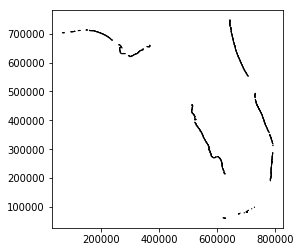

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
#pdensity.plot(column='COUNT', cmap='OrRd', scheme='quantiles')
#scheme='quantiles', 
rzones.plot(column='aug2016_me', cmap='OrRd', edgecolor='Black')

Set a  MAPBOX_ACCESS_TOKEN environment variable or copy/paste your token from https://www.mapbox.com/studio/account/tokens/

In [6]:
import os
try:
    from mapboxgl.viz import *
    from mapboxgl.utils import *
    import pysal.esda.mapclassify as mapclassify

except:
    print("Problem importing Mapbox-gl or pysal libraries")
    
# Must be a public token, starting with `pk`
token = os.getenv('MAPBOX_ACCESS_TOKEN')
if token == None or token[0:2] != 'pk':
    print("Problem getting public mapbox access token, check environment variables setup")

In [24]:
# mapbox-gl wants a geojson file on disk...
import os
geojson_file = 'rzones.geojson'
if not os.path.exists(geojson_file):
    rzones.to_crs('+init=epsg:4326').to_file(filename=geojson_file, driver="GeoJSON")
else:
    print('Using prior geojson file from disk, remove if that is not what you want!')

In [33]:
!ls -l rzones.geojson

-rw-r--r--  1 mflaxman  staff  3722145 Jul  5 12:29 rzones.geojson


In [26]:
# Generate data breaks and color stops from colorBrewer
color_breaks = mapclassify.Natural_Breaks(rzones['aug2016_me'], k=8, initial=0).bins
color_breaks

array([ 1.24113732,  3.26834361,  6.54770915, 11.55453339, 18.39732828,
       28.67466736, 46.13581035, 83.30645879])

In [42]:
try:
    import mapboxgl.utils as u
except:
    print('Import problem')
    
color_stops = u.create_color_stops(color_breaks, colors='YlGnBu')


In [43]:
color_stops

[[1.2411373181, 'rgb(255,255,217)'],
 [3.2683436145, 'rgb(237,248,177)'],
 [6.5477091459, 'rgb(199,233,180)'],
 [11.554533388, 'rgb(127,205,187)'],
 [18.397328279, 'rgb(65,182,196)'],
 [28.674667358, 'rgb(29,145,192)'],
 [46.135810353, 'rgb(34,94,168)'],
 [83.30645879, 'rgb(12,44,132)']]

In [63]:
# Radius stops for linear interpolation
lighting_radius_stops = [
    [0.0, 10.0],
    [5.0, 12.0],
    [10.0, 14.0],
    [25.0, 16.0],
    [50.0, 18.0],
    [100.0, 20.0],   
]

# Create the viz from the dataframe
viz = CircleViz('rzones.geojson',
                access_token=token, 
                height='400px',
                color_property = "aug2016_me",
                color_stops = color_stops,
                center = (-81.442263832474609, 30.559170717501537),
                zoom = 8,
                below_layer = 'waterway-label'
                )

viz.radius_property = 'aug2016_me'
viz.radius_type = 'exponential'
viz.radius_stops = lighting_radius_stops
viz.show()

In [74]:
# create choropleth from polygon features stored as GeoJSON
# line_color='rgb(128,0,38)',
viz = ChoroplethViz('rzones.geojson', 
                     color_property='aug2016_me',
                     color_stops=color_stops,
                     color_function_type='interpolate',
                     line_stroke='--',
                     opacity=0.8,
                     center=(-81.442263832474609, 30.559170717501537),
                     zoom=6,
                     below_layer='waterway-label'
                    )

viz.line_width_stops=create_numeric_stops([0, 5, 10, 25, 100], 0.1, 6)
viz.line_width_property='aug2016_me'
viz.line_width_function_type='interpolate'
viz.line_width_default='1'


viz.show()

Normal 'future armoring'

In [14]:
!ls -l {path}future_armoring_directional_take_*_w_regions.shp

-rw-r--r--@ 1 mflaxman  staff  568224 Jun 19 16:25 /Users/mflaxman/Dropbox/fbhcp/Research/armoring/future_armoring_directional_take_nonbreeding_shorebirds_w_regions.shp
-rw-r--r--@ 1 mflaxman  staff  640700 Oct  3  2017 /Users/mflaxman/Dropbox/fbhcp/Research/armoring/future_armoring_directional_take_seaturtles_w_regions.shp


In [15]:
!ls -l /Users/mflaxman/Dropbox/fbhcp/it/gap*.shp

-rw-r--r--@ 1 mflaxman  staff  160356 Aug 24  2017 /Users/mflaxman/Dropbox/fbhcp/it/gap_armoring_buffers_both_sides.shp
-rw-r--r--@ 1 mflaxman  staff   10068 Aug 24  2017 /Users/mflaxman/Dropbox/fbhcp/it/gap_armoring_colonial_nester_impacts.shp
-rw-r--r--@ 1 mflaxman  staff   10068 Aug 24  2017 /Users/mflaxman/Dropbox/fbhcp/it/gap_armoring_colonial_nesters_impacts.shp
-rw-r--r--@ 1 mflaxman  staff   37220 Aug 24  2017 /Users/mflaxman/Dropbox/fbhcp/it/gap_armoring_gopher_tortoise_impacts.shp
-rw-r--r--@ 1 mflaxman  staff  134288 Aug 24  2017 /Users/mflaxman/Dropbox/fbhcp/it/gap_armoring_impacts_right_nonbreeding_shorebirds.shp
-rw-r--r--@ 1 mflaxman  staff   73796 Aug 23  2017 /Users/mflaxman/Dropbox/fbhcp/it/gap_armoring_impacts_right_seaturtle.shp
-rw-r--r--@ 1 mflaxman  staff   30428 Aug 23  2017 /Users/mflaxman/Dropbox/fbhcp/it/gap_armoring_leftside_100m_buffer.shp
-rw-r--r--@ 1 mflaxman  staff   80044 Aug 23  2017 /Users/mflaxman/Dropbox/fbhcp/it/gap_armoring_leftside_100m_buffer_v

In [75]:
# this is challengingly byzantine...
# try to keep the left if needed, and keep and rename right below
potentialDrops = ['FBHCP_Regn_right','aug2012_me', 'aug2016_me', 'PcntDelta', 'abs_dif', \
                 'prot_min', 'prot_max', 'prot_sum', 'prot_count','prot_mean','prot_std','prot_uniqu', \
                 'NoWrack15', 'Disturb15', 'Tracks15', 'Unposted15', \
                 'COUNTY_left','COUNTYFP', \
                 'Hectares', 'RMon_ID', \
                 'RANGE', 'STATE', 'MONUMENT_N', 'index_right', \
                 'FIPSSTCO',  'OBJECTID', \
                 'COMMENTS', 'ImpactType', 'DATE_', 'ORGINATOR', \
                 'Coast', 'Shape_Leng', 'Shape_Area', 'SPE_GROUP', \
                 'MONUMENT_N_left', 'MONUMENT_N_right', 'FIPSSTCO_left','FIPSSTCO_right', \
                 'UNIQUE_ID_right', 'FBHCP_Regn_2', 'COUNTY_2']
#'Side','side',
def cleanFrame(df):
    cols = df.columns
    for d in potentialDrops:
        if d in cols:
            df = df.drop(d, axis=1)
    return df # cleaned up copy

In [114]:
def renameColumns(df):
    df = df.rename(columns={'FBHCP_Regn_left': 'Region', \
                        'FBHCP_Regn': 'Region', \
                        'DirectAc': 'Direct Take Acres', \
                        'IndirectAc': 'Indirect Take Acres', \
                        'Acres': ' Total Acres', \
                        'UNIQUE_ID': 'R-Zone', \
                        'UNIQUE_ID_left': 'R-Zone', \
                        'COUNTY_right': 'County', \
                        'COUNTY': 'County', \
                        'Spp_Group': 'Species', \
                        'side': 'Side'})
    return(df)

In [117]:
# use directional buffers intersected manually in GIS

species_abbr = ('strt','solo','colo','nbsb')
#species_abbr = ('strt',)

# empty master cross-species report for appending
all_arm_impacts_all_species_by_rzone = None

for species in species_abbr:
    print('\n\nWorking on {}'.format(species))
    if species == 'strt':
        file = 'future_armoring_directional_take_seaturtles_w_regions.shp'
        gfile = 'gap_armoring_seaturtle_impacts_v2.shp'
    elif species == 'solo':
        file = 'future_armoring_directional_take_solitary_shorebirds_by_region.shp'
        gfile = 'gap_armoring_solitary_nester_impacts.shp'
    elif species == 'colo':
        file = 'future_armoring_directional_take_colonial_shorebirds_by_region.shp'
        gfile = 'gap_armoring_colonial_nesters_impacts.shp'
    elif species == 'nbsb':
        file = 'future_armoring_directional_take_nonbreeding_shorebirds_w_regions.shp'
        # error?  was future
        gfile = 'gap_armoring_nonbreeding_shorebird_impacts.shp'
    else:
        print("Error - unknown species")
        raise
        
    try:
        fut_arm_impacts = gpd.read_file(os.path.join(path, file)).to_crs(rzones.crs)
        print('Performing spatial join of future armoring impacts and rzones for species {}'.format(species))
        #fut_arm_impacts_by_rzone = gpd.sjoin(fut_arm_impacts, rzones, how="inner", op='intersects')
        fut_arm_impacts_by_rzone = gpd.overlay(fut_arm_impacts, rzones, how='intersection')
        fut_arm_impacts_by_rzone['Acres2'] = (fut_arm_impacts_by_rzone['geometry'].area/ 10**4) * 2.54
    except:
        raise ValueError("Problem reading or joining future armoring impacts file '{}' in folder '{}'".format(file, path))
    
    try:
        gap_arm_impacts = gpd.read_file(os.path.join(gpath, gfile)).to_crs(rzones.crs)
        print('Performing spatial join of gap armoring impacts and rzones for species {}'.format(species))
        #gap_arm_impacts_by_rzone = gpd.sjoin(gap_arm_impacts, rzones, how="inner", op='intersects')
        gap_arm_impacts_by_rzone = gpd.overlay(fut_arm_impacts, rzones, how='intersection')
        gap_arm_impacts_by_rzone['Acres2'] = (gap_arm_impacts_by_rzone['geometry'].area/ 10**4) * 2.54

    except:
        raise ValueError("Problem reading or joining gap armoring impacts file '{}'".format(gfile))

    # create Direct/Indirect flag field based on side
    fut_arm_impacts_by_rzone['Activity'] = 'Armoring'
    fut_arm_impacts_by_rzone['Type'] = 'Future Armoring'
    fut_arm_impacts_by_rzone = renameColumns(fut_arm_impacts_by_rzone)
    fut_arm_impacts_by_rzone = cleanFrame(fut_arm_impacts_by_rzone)
    print('Future armoring impact columns follow for species {}'.format(species))
    print(fut_arm_impacts_by_rzone.columns)
    fut_arm_impacts_by_rzone_report = fut_arm_impacts_by_rzone.pivot_table(index=['Region','County','R-Zone','Species','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                                   aggfunc=np.sum).round(1)
    outfile = os.path.join(report_path, 'fbhcp_chp8_fut_arm_{}_take_by_rzone.xls'.format(species))
    fut_arm_impacts_by_rzone_report.to_excel(outfile)

    fut_arm_impacts_by_region_report = fut_arm_impacts_by_rzone.pivot_table(index=['Region','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                                   aggfunc=np.sum).round(1)
    #fut_arm_impacts_by_region_report
    
    outfile = os.path.join(report_path, 'fbhcp_chp8_fut_arm_{}_take_by_region.xls'.format(species))
    fut_arm_impacts_by_region_report.to_excel(outfile)
    
    gap_arm_impacts_by_rzone['Activity'] = 'Armoring'
    gap_arm_impacts_by_rzone['Type'] = 'Gap Armoring'
    gap_arm_impacts_by_rzone = renameColumns(gap_arm_impacts_by_rzone)
    gap_arm_impacts_by_rzone = cleanFrame(gap_arm_impacts_by_rzone)
    #print('Gap armoring impact columns follow for species {}'.format(species))
    #print(gap_arm_impacts_by_rzone.columns)
    gap_arm_impacts_by_rzone_report = gap_arm_impacts_by_rzone.pivot_table(index=['Region','County','R-Zone','Species','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum).round(1)
    outfile = os.path.join(report_path, 'fbhcp_chp8_gap_arm_{}_take_by_rzone.xls'.format(species))
    gap_arm_impacts_by_rzone_report.to_excel(outfile)

    gap_arm_impacts_by_region_report = gap_arm_impacts_by_rzone.pivot_table(index=['Region','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum, margins=True).round(1)
    #gap_arm_impacts_by_region_report
    outfile = os.path.join(report_path, 'fbhcp_chp8_gap_arm_{}_take_by_region.xls'.format(species))
    gap_arm_impacts_by_region_report.to_excel(outfile)

    print('Generating combined future and gap armoring reports for species {}'.format(species))
    all_arm_impacts_by_region = fut_arm_impacts_by_region_report.append(gap_arm_impacts_by_region_report)
    all_arm_impacts_by_region = renameColumns(all_arm_impacts_by_region)
    all_arm_impacts_by_region = cleanFrame(all_arm_impacts_by_region)
    #print('All armoring impact columns follow for species {}'.format(species))
    #print(all_arm_impacts_by_region.columns)
    #print(all_arm_impacts_by_region.head())

    all_arm_impacts_by_region_report = all_arm_impacts_by_region.pivot_table(index=['Region'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum).round(1)
    outfile = os.path.join(report_path, 'fbhcp_chp8_arm_{}_take_by_region.xls'.format(species))
    all_arm_impacts_by_region_report.to_excel(outfile)
    print('Combined report for species {} exported to excel file "{}"'.format(species, outfile))
    
    all_arm_impacts_by_rzone = fut_arm_impacts_by_rzone_report.append(gap_arm_impacts_by_rzone_report)
    all_arm_impacts_by_rzone = renameColumns(all_arm_impacts_by_rzone)
    all_arm_impacts_by_rzone = cleanFrame(all_arm_impacts_by_rzone)
    #impacts['File'] = 'Upland June 27 2018'
    #qa_take_by_rzone_report = impacts.pivot_table(index=['File','R-zone','FBHCP_Regn','activity','species','quality'], values=['Ac Direct','Ac Indirect','QA Direct','QA Indirect'],
    #                           aggfunc=np.sum, margins=True, fill_value=0).round(2)

    all_arm_impacts_by_rzone['File'] = 'Armoring June 27 2018'
    all_arm_impacts_by_rzone['Activity'] = 'Armoring'
    
    all_arm_impacts_by_rzone_report = all_arm_impacts_by_rzone.pivot_table(index=['File','R-Zone','Region','Activity','Species','County'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum).round(1)
    outfile = os.path.join(report_path, 'fbhcp_chp8_arm_{}_take_by_rzone.xls'.format(species))
    all_arm_impacts_by_rzone_report.to_excel(outfile)

    if all_arm_impacts_all_species_by_rzone is None:
        print('Generating initial all species report')
        all_arm_impacts_all_species_by_rzone = all_arm_impacts_by_rzone_report
    else:
        print('Adding to all species report')
        all_arm_impacts_all_species_by_rzone = all_arm_impacts_all_species_by_rzone.append(all_arm_impacts_by_rzone_report)

print('Done with species-level reports, creating grand total report')
outfile = os.path.join(report_path, 'fbhcp_chp8_arm_all_sp_take_by_rzone.xls')
all_arm_impacts_all_species_by_rzone.to_excel(outfile)
                       
print('Done.')



Working on strt
Performing spatial join of future armoring impacts and rzones for species strt
Performing spatial join of gap armoring impacts and rzones for species strt
Future armoring impact columns follow for species strt
Index([                 u'ID',           u'PARCELNUM',            u'LENGTHFT',
                    u'County',                u'Side',             u'Species',
              u' Total Acres', u'Indirect Take Acres',   u'Direct Take Acres',
                    u'Region',              u'R-Zone',            u'geometry',
                    u'Acres2',            u'Activity',                u'Type'],
      dtype='object')
Generating combined future and gap armoring reports for species strt
Combined report for species strt exported to excel file "/Users/mflaxman/Dropbox/fbhcp/reports/fbhcp_chp8_arm_strt_take_by_region.xls"
Generating initial all species report


Working on solo
Performing spatial join of future armoring impacts and rzones for species solo
Performing spat

### Link Back Quality based on R-Zones

In [143]:
# find the aggregation layer, which has rzone ids and quality summaries
mit_file = '/Users/mflaxman/Dropbox/fbhcp/it4/mitigation.shp'
mit = gpd.read_file(mit_file)

In [144]:
mit.head()

,IMPACT_ID,BALANCE_TA,SCENARIO_I,ACTION_COD,SCEN_NAME,ACT_NAME,ACT_CODE,SPE_NAME,SPE_CODE,ACRES,QUALITY,IMPACT,DIRECT_IMP,MITIGATION,MNG_QUALIT,MNG_MITIGA,AGG_ID,AGG_NAME,SPE_RICHNE,geometry
0,440566,NE,42,None,Plan Trend with Directional Armoring,None,None,Nonbreeding Shorebirds,NBSB,0.000000,2,0,F,0,1,0,14371,SJ R-105,3.0,POLYGON ((-81.30711225378276 29.96135454937727...
1,440567,NE,42,None,Plan Trend with Directional Armoring,None,None,Gopher Tortoise,GOTO,0.527411,3,0,F,0,1,0,14371,SJ R-105,3.0,POLYGON ((-81.30711225378276 29.96135454937727...
2,445296,NE,42,"{""926 LITE"",""927 PRED"",""930 VOCO"",""925 LORD"",""...",Plan Trend with Directional Armoring,Direct - Beach Armoring Landward,ARMR,Seaturtles,STRT,0.124314,4,4,T,0,1,0,13980,DU R-070,2.0,POLYGON ((-81.38717836816745 30.27792239621033...
3,445297,NE,42,"{""926 LITE"",""927 PRED"",""930 VOCO"",""925 LORD"",""...",Plan Trend with Directional Armoring,"Direct - Large Non-native Landscape, Pools & D...",LSPl,Seaturtles,STRT,0.270149,4,4,T,0,1,0,13980,DU R-070,2.0,POLYGON ((-81.38717836816745 30.27792239621033...
4,445298,NE,42,"{""926 LITE"",""927 PRED"",""930 VOCO"",""925 LORD"",""...",Plan Trend with Directional Armoring,"Direct - Large Non-native Landscape, Pools & D...",LSPl,Nonbreeding Shorebirds,NBSB,0.088441,1,1,T,0,1,0,13980,DU R-070,2.0,POLYGON ((-81.38717836816745 30.27792239621033...


In [145]:
rq = mit[['AGG_NAME', 'SPE_NAME', 'QUALITY', 'BALANCE_TA']].copy()
rq.rename(columns = {'AGG_NAME':'R-Zone'}, inplace = True)

,R-Zone,SPE_NAME,QUALITY,BALANCE_TA
0,SJ R-105,Nonbreeding Shorebirds,2,NE
1,SJ R-105,Gopher Tortoise,3,NE
2,DU R-070,Seaturtles,4,NE
3,DU R-070,Seaturtles,4,NE
4,DU R-070,Nonbreeding Shorebirds,1,NE


In [150]:
def Region(row):
    if row['BALANCE_TA'] == 'NW':
        return('Panhandle')
    if row['BALANCE_TA'] == 'NE':
        return('Northeast')
    if row['BALANCE_TA'] == 'SW':
        return('Gulf')
    if row['BALANCE_TA'] == 'SE':
        return('Southeast')

In [151]:
rq['Region'] = rq.apply(Region, axis=1)

In [152]:
rq.head()

,R-Zone,SPE_NAME,QUALITY,BALANCE_TA,Region
0,SJ R-105,Nonbreeding Shorebirds,2,NE,Northeast
1,SJ R-105,Gopher Tortoise,3,NE,Northeast
2,DU R-070,Seaturtles,4,NE,Northeast
3,DU R-070,Seaturtles,4,NE,Northeast
4,DU R-070,Nonbreeding Shorebirds,1,NE,Northeast


In [153]:
# join on AGG_NAME = UNIQUE_ID
all_arm_impacts_all_species_by_rzone_qual = pd.merge(all_arm_impacts_all_species_by_rzone, rq, how='inner',  on='R-Zone')

In [154]:
all_arm_impacts_all_species_by_rzone_qual.columns

Index([             u'R-Zone',        u' Total Acres',   u'Direct Take Acres',
       u'Indirect Take Acres',            u'SPE_NAME',             u'QUALITY',
                u'BALANCE_TA',              u'Region'],
      dtype='object')

In [160]:
all_arm_impacts_all_species_by_rzone_qual.drop('BALANCE_TA', axis=1, inplace=True)

In [162]:
all_arm_impacts_all_species_by_rzone_qual.rename(columns = {'SPE_NAME':'Species', 'QUALITY':'Quality'}, inplace = True)

In [163]:
all_arm_impacts_all_species_by_rzone_qual.head()

,R-Zone,Total Acres,Direct Take Acres,Indirect Take Acres,Species,Quality,Region,QA Direct Take,QA Indirect Take
0,BA R-000,0.6,0.2,0.4,Nonbreeding Shorebirds,3,Panhandle,0.6,1.2
1,BA R-000,0.6,0.2,0.4,Seaturtles,4,Panhandle,0.8,1.6
2,BA R-000,0.6,0.2,0.4,Solitary Nesting Shorebirds,2,Panhandle,0.4,0.8
3,BA R-000,0.6,0.2,0.4,Colonial Nesting Shorebirds,4,Panhandle,0.8,1.6
4,BA R-000,0.6,0.2,0.4,Seaturtles,2,Panhandle,0.4,0.8


In [156]:
all_arm_impacts_all_species_by_rzone_qual['QA Direct Take'] = all_arm_impacts_all_species_by_rzone_qual['Direct Take Acres'] * all_arm_impacts_all_species_by_rzone_qual['QUALITY'] 

In [157]:
all_arm_impacts_all_species_by_rzone_qual['QA Indirect Take'] = all_arm_impacts_all_species_by_rzone_qual['Indirect Take Acres'] * all_arm_impacts_all_species_by_rzone_qual['QUALITY'] 

In [164]:
all_arm_impacts_all_species_by_rzone_qual

,R-Zone,Total Acres,Direct Take Acres,Indirect Take Acres,Species,Quality,Region,QA Direct Take,QA Indirect Take
0,BA R-000,0.6,0.2,0.4,Nonbreeding Shorebirds,3,Panhandle,0.6,1.2
1,BA R-000,0.6,0.2,0.4,Seaturtles,4,Panhandle,0.8,1.6
2,BA R-000,0.6,0.2,0.4,Solitary Nesting Shorebirds,2,Panhandle,0.4,0.8
3,BA R-000,0.6,0.2,0.4,Colonial Nesting Shorebirds,4,Panhandle,0.8,1.6
4,BA R-000,0.6,0.2,0.4,Seaturtles,2,Panhandle,0.4,0.8
5,BA R-000,0.6,0.2,0.4,Colonial Nesting Shorebirds,5,Panhandle,1.0,2.0
6,BA R-000,0.6,0.2,0.4,Nonbreeding Shorebirds,3,Panhandle,0.6,1.2
7,BA R-000,0.6,0.2,0.4,Solitary Nesting Shorebirds,3,Panhandle,0.6,1.2
8,BA R-000,0.6,0.2,0.4,Gopher Tortoise,3,Panhandle,0.6,1.2
9,BA R-000,0.6,0.2,0.4,Nonbreeding Shorebirds,3,Panhandle,0.6,1.2


In [165]:
# figure out how to re-order columns of DF display, or use pivot table?

In [177]:
all_arm_impacts_all_species_by_rzone_qual['Activity'] = 'Armoring'
all_arm_impacts_all_species_by_rzone_qual['File'] = 'Armoring June 27 2018'
all_arm_all_sp_qa_impacts_report = all_arm_impacts_all_species_by_rzone_qual.pivot_table(index=['File','R-Zone','Region','Activity','Species','Quality'], values=['Indirect Take Acres','Direct Take Acres', 'QA Direct Take', 'QA Indirect Take'],
                                   aggfunc=np.sum).round(1)
outfile = os.path.join(report_path, 'fbhcp_chp11_arm_qa_take_by_rzone.xls')
all_arm_all_sp_qa_impacts_report.to_excel(outfile)

In [178]:
!open {outfile}

### older stuff

In [120]:
gap_arm_impacts_by_rzone.head()

,Species,Total Acres,ID,PARCELNUM,LENGTHFT,County,Side,Indirect Take Acres,Direct Take Acres,Region,R-Zone,geometry,Acres2,Activity,Type
0,Non-breeding Shorebirds,0.876840,1,3042100040001,313.971153,Miami-Dade,Seaward,0.88,NaN,Southeast,DA R-077,"POLYGON ((786908.4793612135 200874.360011571, ...",0.872581,Armoring,Gap Armoring
1,Non-breeding Shorebirds,0.008399,1,3042100040001,313.971153,Miami-Dade,Landward,NaN,0.01,Southeast,DA R-077,"POLYGON ((786854.3793484152 200862.5773495915,...",0.008399,Armoring,Gap Armoring
2,Non-breeding Shorebirds,0.210518,3,0242100110001,390.500669,Miami-Dade,Seaward,0.21,NaN,Southeast,DA R-075,"POLYGON ((787143.8797000009 201373.7432000001,...",0.210310,Armoring,Gap Armoring
3,Non-breeding Shorebirds,0.049974,3,0242100110001,390.500669,Miami-Dade,Landward,NaN,0.05,Southeast,DA R-075,"POLYGON ((787183.3197012153 201427.996694788, ...",0.049974,Armoring,Gap Armoring
4,Non-breeding Shorebirds,0.426951,2,3042100100001,161.228130,Miami-Dade,Seaward,0.43,NaN,Southeast,DA R-076,"POLYGON ((787012.4909585989 201201.0839925793,...",0.422551,Armoring,Gap Armoring


In [121]:
of = 'gap_arm_impacts_by_rzone_clean.shp'
gap_arm_impacts_by_rzone.to_file(of)

In [122]:
gap_arm_impacts_by_rzone.sort_values('Direct Take Acres', ascending=False)

,Species,Total Acres,ID,PARCELNUM,LENGTHFT,County,Side,Indirect Take Acres,Direct Take Acres,Region,R-Zone,geometry,Acres2,Activity,Type
1569,Non-breeding Shorebirds,4.765146,4,A1A,12557.090306,Flagler,Landward,NaN,4.77,Northeast,FL R-070,"POLYGON ((677158.0541390751 613632.2850721864,...",1.702238e-10,Armoring,Gap Armoring
1565,Non-breeding Shorebirds,4.765146,4,A1A,12557.090306,Flagler,Landward,NaN,4.77,Northeast,FL R-071,"POLYGON ((677287.5467766506 613343.8255114512,...",2.397018e-10,Armoring,Gap Armoring
1588,Non-breeding Shorebirds,4.765146,4,A1A,12557.090306,Flagler,Landward,NaN,4.77,Northeast,FL R-080,"POLYGON ((678254.6731240777 611214.5159540176,...",4.426455e-02,Armoring,Gap Armoring
1586,Non-breeding Shorebirds,4.765146,4,A1A,12557.090306,Flagler,Landward,NaN,4.77,Northeast,FL R-079,"POLYGON ((678129.6351486694 611485.9245967533,...",1.072276e-01,Armoring,Gap Armoring
1583,Non-breeding Shorebirds,4.765146,4,A1A,12557.090306,Flagler,Landward,NaN,4.77,Northeast,FL R-077,"POLYGON ((678016.4120855121 611753.4498742099,...",9.476105e-01,Armoring,Gap Armoring
1582,Non-breeding Shorebirds,4.765146,4,A1A,12557.090306,Flagler,Landward,NaN,4.77,Northeast,FL R-078,"POLYGON ((678004.1397974278 611748.5409589767,...",7.449059e-01,Armoring,Gap Armoring
1575,Non-breeding Shorebirds,4.765146,4,A1A,12557.090306,Flagler,Landward,NaN,4.77,Northeast,FL R-073,"POLYGON ((677408.6244345697 613074.0901227556,...",2.825854e-11,Armoring,Gap Armoring
1574,Non-breeding Shorebirds,4.765146,4,A1A,12557.090306,Flagler,Landward,NaN,4.77,Northeast,FL R-073,"POLYGON ((677405.7013803396 613073.3723873978,...",1.715797e-01,Armoring,Gap Armoring
1573,Non-breeding Shorebirds,4.765146,4,A1A,12557.090306,Flagler,Landward,NaN,4.77,Northeast,FL R-068,"POLYGON ((676807.181063619 614386.3134140192, ...",1.660926e-01,Armoring,Gap Armoring
1572,Non-breeding Shorebirds,4.765146,4,A1A,12557.090306,Flagler,Landward,NaN,4.77,Northeast,FL R-068,"POLYGON ((676915.1816560016 614154.2194937735,...",3.064510e-11,Armoring,Gap Armoring


In [123]:
of = 'fut_arm_impacts_by_rzone_clean.shp'
fut_arm_impacts_by_rzone.to_file(of)

In [124]:
all_arm_impacts_by_rzone.sort_values('Direct Take Acres', ascending=False)

Total Acres  \
Region    County       R-Zone   Species                 Type                            
Northeast Flagler      FL R-079 Non-breeding Shorebirds Future Armoring          43.7   
                       FL R-070 Non-breeding Shorebirds Gap Armoring             43.7   
                                                        Future Armoring          43.7   
                       FL R-079 Non-breeding Shorebirds Gap Armoring             43.7   
Southeast Broward      BO R-065 Non-breeding Shorebirds Gap Armoring             14.8   
                                                        Future Armoring          14.8   
Northeast Flagler      FL R-091 Non-breeding Shorebirds Gap Armoring             51.6   
                                                        Future Armoring          51.6   
                       FL R-072 Non-breeding Shorebirds Future Armoring          38.9   
                       FL R-071 Non-breeding Shorebirds Future Armoring          38.9   
                       FL R-072 Non-breeding Shorebirds Gap Armoring             38.9   
                       FL R-069 Non-breeding Shorebirds Future Armoring          38.9   
                       FL R-071 Non-breeding Shorebirds Gap Armoring             38.9   
                       FL R-073 Non-breeding Shorebirds Future Armoring          38.9   
                                                        Gap Armoring             38.9   
                       FL R-068 Non-breeding Shorebirds Future Armoring          38.9   
                       FL R-069 Non-breeding Shorebirds Gap Armoring             38.9   
                       FL R-068 Non-breeding Shorebirds Gap Armoring             38.9   
                       FL R-080 Non-breeding Shorebirds Gap Armoring             34.2   
                       FL R-075 Non-breeding Shorebirds Gap Armoring             34.2   
                       FL R-076 Non-breeding Shorebirds Gap Armoring             34.2   
                       FL R-078 Non-breeding Shorebirds Gap Armoring             34.2   
                       FL R-077 Non-breeding Shorebirds Gap Armoring             34.2   
                       FL R-074 Non-breeding Shorebirds Future Armoring          34.2   
                       FL R-075 Non-breeding Shorebirds Future Armoring          34.2   
                       FL R-076 Non-breeding Shorebirds Future Armoring          34.2   
                       FL R-080 Non-breeding Shorebirds Future Armoring          34.2   
                       FL R-078 Non-breeding Shorebirds Future Armoring          34.2   
                       FL R-077 Non-breeding Shorebirds Future Armoring          34.2   
                       FL R-074 Non-breeding Shorebirds Gap Armoring             34.2   
...                                                                               ...   
Gulf      Charlotte    CH R-006 Non-breeding Shorebirds Gap Armoring              0.1   
                       CH R-013 Non-breeding Shorebirds Gap Armoring              0.9   
                       CH R-014 Non-breeding Shorebirds Gap Armoring              0.9   
                       CH R-022 Non-breeding Shorebirds Gap Armoring              1.1   
                       CH R-048 Non-breeding Shorebirds Gap Armoring              0.5   
                       CH R-050 Non-breeding Shorebirds Gap Armoring              0.0   
Southeast Palm Beach   PB R-164 Non-breeding Shorebirds Future Armoring           0.1   
                       PB R-161 Non-breeding Shorebirds Future Armoring           1.3   
                       PB R-041 Non-breeding Shorebirds Future Armoring           1.5   
                       PB R-040 Non-breeding Shorebirds Future Armoring           3.3   
          Broward      BO R-058 Non-breeding Shorebirds Future Armoring           0.6   
                       BO R-059 Non-breeding Shorebirds Future Armoring           0.3   
                       BO R-060 Non-breeding Shorebirds Future Armori

In [23]:
!open /Users/mflaxman/Dropbox/fbhcp/reports/fbhcp_chp8_arm_strt_take_by_region.xls

In [19]:
!ls -l /Users/mflaxman/Dropbox/fbhcp/Research/armoring/*.shp

-rw-r--r--@ 1 mflaxman  staff     3660 Oct  3  2017 /Users/mflaxman/Dropbox/fbhcp/Research/armoring/Choctawhatchee_beachmouse_armoring_directional_take.shp
-rw-r--r--@ 1 mflaxman  staff      580 Oct  3  2017 /Users/mflaxman/Dropbox/fbhcp/Research/armoring/Santa_Rosa_Beach_Mouse_Armoring_Directional_Incidental_Take.shp
-rw-r--r--  1 mflaxman  staff  1125952 May  1 08:21 /Users/mflaxman/Dropbox/fbhcp/Research/armoring/fbhcp_fut_arm_5m_sim2020_2045.shp
-rw-r--r--@ 1 mflaxman  staff   412732 Aug 10  2017 /Users/mflaxman/Dropbox/fbhcp/Research/armoring/future_armoring_direction_lines.shp
-rw-r--r--@ 1 mflaxman  staff   639204 Aug 20  2017 /Users/mflaxman/Dropbox/fbhcp/Research/armoring/future_armoring_directional_polys.csv.shp
-rw-r--r--@ 1 mflaxman  staff   639180 Aug 20  2017 /Users/mflaxman/Dropbox/fbhcp/Research/armoring/future_armoring_directional_polys_w_regions.shp
-rw-r--r--@ 1 mflaxman  staff   234912 Aug 20  2017 /Users/mflaxman/Dropbox/fbhcp/Research/armoring/future_armoring_dire

In [309]:
strt_gap_arm_impacts_by_rzone['Type'] = 'Gap Armoring'
strt_gap_arm_impacts_by_rzone.rename(columns={'FBHCP_Regn_left': 'Region', \
                                             'DirectAc': 'Direct Take Acres',
                                             'IndirectAc': 'Indirect Take Acres', 
                                             'Acres': ' Total Acres'},\
                                     inplace=True)
strt_gap_arm_impacts_by_rzone.rename(columns={'Spp_Group': 'Species'}, inplace=True)
strt_gap_arm_impacts_by_region = strt_gap_arm_impacts_by_rzone.pivot_table(index=['Region','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum, margins=True).round(1)
strt_gap_arm_impacts_by_region

,,Total Acres,Direct Take Acres,Indirect Take Acres
Region,Type,,,
Gulf,Gap Armoring,39.2,3.1,36.1
Northeast,Gap Armoring,81.6,6.9,74.7
Panhandle,Gap Armoring,99.7,14.5,85.3
Southeast,Gap Armoring,42.5,5.3,37.2
All,,263.1,29.8,233.3


In [4]: frames = [df1, df2, df3]

In [5]: result = pd.concat(frames)

In [310]:
strt_all_arm_impacts_by_region.columns

Index([u' Total Acres', u'Direct Take Acres', u'Indirect Take Acres'], dtype='object')

In [311]:
strt_all_arm_impacts_by_region = strt_fut_arm_impacts_report2.append(strt_gap_arm_impacts_by_region)
strt_all_arm_impacts_by_region.reindex()

,,Total Acres,Direct Take Acres,Indirect Take Acres
Region,Type,,,
Gulf,Future Armoring,118.1,30.1,88.0
Northeast,Future Armoring,938.9,228.1,710.9
Panhandle,Future Armoring,423.9,90.9,333.2
Southeast,Future Armoring,570.5,132.3,438.3
All,,2051.5,481.4,1570.3
Gulf,Gap Armoring,39.2,3.1,36.1
Northeast,Gap Armoring,81.6,6.9,74.7
Panhandle,Gap Armoring,99.7,14.5,85.3
Southeast,Gap Armoring,42.5,5.3,37.2


In [312]:
path = '/Users/mflaxman/Dropbox/fbhcp/reports/'
file = os.path.join(path, 'chp8_arm_strt_take_by_region.xls')
strt_all_arm_impacts_by_region.to_excel(file)

In [313]:
!open {file}

### Solitary Nesting Shorebirds

In [314]:
solo_fut_arm_impacts_by_rzone['Type'] = 'Future Armoring'
solo_fut_arm_impacts_by_rzone.rename(columns={'FBHCP_Regn_left': 'Region', \
                                             'DirectAc': 'Direct Take Acres',
                                             'IndirectAc': 'Indirect Take Acres', 
                                             'Acres': ' Total Acres'},\
                                     inplace=True)
solo_fut_arm_impacts_by_rzone.rename(columns={'Spp_Group': 'Species'}, inplace=True)
solo_fut_arm_impacts_regional_report = solo_fut_arm_impacts_by_rzone.pivot_table(index=['Region','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum, margins=True).round(1)
solo_fut_arm_impacts_regional_report

,,Total Acres,Direct Take Acres,Indirect Take Acres
Region,Type,,,
Gulf,Future Armoring,26.3,2.3,24.0
Northeast,Future Armoring,19.8,0.0,19.8
Panhandle,Future Armoring,128.8,40.2,88.5
All,,174.9,42.6,132.3


In [315]:
solo_gap_arm_impacts_by_rzone['Type'] = 'Gap Armoring'
solo_gap_arm_impacts_by_rzone.rename(columns={'FBHCP_Regn_left': 'Region', \
                                             'DirectAc': 'Direct Take Acres',
                                             'IndirectAc': 'Indirect Take Acres', 
                                             'Acres': ' Total Acres'},\
                                     inplace=True)
solo_gap_arm_impacts_by_rzone.rename(columns={'Spp_Group': 'Species'}, inplace=True)
solo_gap_arm_impacts_by_region = solo_gap_arm_impacts_by_rzone.pivot_table(index=['Region','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum, margins=True).round(1)
solo_gap_arm_impacts_by_region

,,Total Acres,Direct Take Acres,Indirect Take Acres
Region,Type,,,
Gulf,Gap Armoring,11.0,0.4,10.7
Northeast,Gap Armoring,5.3,0.0,5.3
Panhandle,Gap Armoring,16.7,2.5,14.2
All,,33.1,2.9,30.1


In [316]:
solo_all_arm_impacts_by_region = solo_fut_arm_impacts_regional_report.append(solo_gap_arm_impacts_by_region)


In [317]:
solo_all_arm_impacts_by_region

,,Total Acres,Direct Take Acres,Indirect Take Acres
Region,Type,,,
Gulf,Future Armoring,26.3,2.3,24.0
Northeast,Future Armoring,19.8,0.0,19.8
Panhandle,Future Armoring,128.8,40.2,88.5
All,,174.9,42.6,132.3
Gulf,Gap Armoring,11.0,0.4,10.7
Northeast,Gap Armoring,5.3,0.0,5.3
Panhandle,Gap Armoring,16.7,2.5,14.2
All,,33.1,2.9,30.1


In [318]:
path = '/Users/mflaxman/Dropbox/fbhcp/reports/'
file = os.path.join(path, 'chp8_arm_solo_take_by_region.xls')
strt_all_arm_impacts_by_region.to_excel(file)

### SOLO by Rzone

Sum both types of armoring by rzone

In [319]:
solo_fut_arm_impacts_by_rzone.columns

Index([            u'Species',          u'Shape_Leng',          u'Shape_Area',
              u' Total Acres',            u'Hectares',                  u'ID',
                 u'PARCELNUM',            u'LENGTHFT',            u'COMMENTS',
               u'COUNTY_left',               u'DATE_',           u'ORGINATOR',
                     u'Coast',                u'Side',              u'Region',
       u'Indirect Take Acres',   u'Direct Take Acres',           u'SPE_GROUP',
                  u'SPE_NAME',          u'ImpactType',            u'geometry',
               u'index_right',            u'OBJECTID',            u'FIPSSTCO',
                     u'STATE',        u'COUNTY_right',           u'UNIQUE_ID',
                u'MONUMENT_N',               u'RANGE',             u'RMon_ID',
                u'aug2012_me',          u'aug2016_me',           u'PcntDelta',
                 u'NoWrack15',           u'Disturb15',            u'Tracks15',
                u'Unposted15',             u'abs_dif

In [320]:
solo_fut_arm_impacts_by_rzone.rename(columns={'FBHCP_Regn_right': 'Region', \
                                             'COUNTY_left': 'County',
                                             'UNIQUE_ID': 'R-zone'
                                             },\
                                     inplace=True)
solo_fut_arm_impacts_by_rzone['Activity Group'] = 'Armoring'

In [321]:
solo_fut_arm_impacts_rzone_report = solo_fut_arm_impacts_by_rzone.pivot_table(index=['Species','R-zone','Activity Group','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum, margins=True).round(1)

In [322]:
solo_fut_arm_impacts_rzone_report

Total Acres  \
Species                     R-zone   Activity Group Type                            
Solitary Nesting Shorebirds BA R-000 Armoring       Future Armoring           0.3   
                            CH R-014 Armoring       Future Armoring           0.3   
                            CH R-015 Armoring       Future Armoring           0.3   
                            CH R-022 Armoring       Future Armoring           1.1   
                            CH R-050 Armoring       Future Armoring           0.0   
                            CH R-064 Armoring       Future Armoring           4.6   
                            CH R-065 Armoring       Future Armoring           6.0   
                            CH R-068 Armoring       Future Armoring           0.4   
                            ES R-152 Armoring       Future Armoring          14.4   
                            ES R-153 Armoring       Future Armoring          14.4   
                            ES R-154 Armoring       Future Armoring          14.4   
                            ES R-155 Armoring       Future Armoring          14.4   
                            FR R-104 Armoring       Future Armoring           4.0   
                            FR R-105 Armoring       Future Armoring           0.9   
                            FR R-110 Armoring       Future Armoring           5.3   
                            FR R-111 Armoring       Future Armoring           2.6   
                            FR R-156 Armoring       Future Armoring           3.8   
                            FR R-157 Armoring       Future Armoring           3.8   
                            FR R-158 Armoring       Future Armoring           1.3   
                            FR R-168 Armoring       Future Armoring           2.5   
                            FR R-169 Armoring       Future Armoring           2.3   
                            FR R-170 Armoring       Future Armoring           1.4   
                            FR R-171 Armoring       Future Armoring           1.4   
                            FR R-172 Armoring       Future Armoring           1.2   
                            FR R-173 Armoring       Future Armoring           0.6   
                            FR R-174 Armoring       Future Armoring           0.2   
                            FR R-175 Armoring       Future Armoring           0.7   
                            FR R-176 Armoring       Future Armoring           1.7   
                            FR R-177 Armoring       Future Armoring           2.2   
                            FR R-178 Armoring       Future Armoring           1.8   
...                                                                           ...   
                            LE R-144 Armoring       Future Armoring           1.7   
                            LE R-145 Armoring       Future Armoring           2.9   
                            LE R-147 Armoring       Future Armoring           1.2   
                            LE R-148 Armoring       Future Armoring           1.0   
                            LE R-151 Armoring       Future Armoring           1.3   
                            LE R-152 Armoring       Future Armoring           1.1   
                            LE R-154 Armoring       Future Armoring           1.6   
                            LE R-155 Armoring       Future Armoring           1.6   
                            OK R-002 Armoring       Future Armoring           0.9   
                            SJ R-121 Armoring       Future Armoring           1.5   
                            SJ R-122 Armoring       Future Armoring           1.5   
                            SJ R-191 Armoring       Future Armoring           0.9   
                            SJ R-192 Armoring       Future Armoring           4.1   
                            SJ R-193 Armoring       Future Armoring           7.1   
                            SJ R-194 Armoring       Future Armoring        

In [323]:
solo_gap_arm_impacts_by_rzone.rename(columns={'FBHCP_Regn_right': 'Region', \
                                             'COUNTY_left': 'County',
                                             'UNIQUE_ID': 'R-zone'
                                             },\
                                     inplace=True)
solo_gap_arm_impacts_by_rzone['Activity Group'] = 'Armoring'

In [324]:
solo_gap_arm_impacts_rzone_report = solo_gap_arm_impacts_by_rzone.pivot_table(index=['Species','R-zone','Activity Group','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum, margins=True).round(1)
solo_gap_arm_impacts_rzone_report.head()

Total Acres  \
Species                     R-zone   Activity Group Type                         
Solitary Nesting Shorebirds CH R-014 Armoring       Gap Armoring           0.1   
                            FR R-104 Armoring       Gap Armoring           0.4   
                            FR R-169 Armoring       Gap Armoring           0.2   
                            FR R-170 Armoring       Gap Armoring           0.6   
                            FR R-171 Armoring       Gap Armoring           1.0   

                                                                  Direct Take Acres  \
Species                     R-zone   Activity Group Type                              
Solitary Nesting Shorebirds CH R-014 Armoring       Gap Armoring                0.0   
                            FR R-104 Armoring       Gap Armoring                0.2   
                            FR R-169 Armoring       Gap Armoring                0.0   
                            FR R-170 Armoring       Gap Armoring                0.4   
                            FR R-171 Armoring       Gap Armoring                0.3   

                                                                  Indirect Take Acres  
Species                     R-zone   Activity Group Type                               
Solitary Nesting Shorebirds CH R-014 Armoring       Gap Armoring                  0.1  
                            FR R-104 Armoring       Gap Armoring                  0.3  
                            FR R-169 Armoring       Gap Armoring                  0.2  
                            FR R-170 Armoring       Gap Armoring                  0.3  
                            FR R-171 Armoring       Gap Armoring                  0.7

In [325]:
solo_all_arm_impacts_by_rzone = solo_fut_arm_impacts_rzone_report.append(solo_gap_arm_impacts_rzone_report)
solo_all_arm_impacts_by_rzone.head()

Total Acres  \
Species                     R-zone   Activity Group Type                            
Solitary Nesting Shorebirds BA R-000 Armoring       Future Armoring           0.3   
                            CH R-014 Armoring       Future Armoring           0.3   
                            CH R-015 Armoring       Future Armoring           0.3   
                            CH R-022 Armoring       Future Armoring           1.1   
                            CH R-050 Armoring       Future Armoring           0.0   

                                                                     Direct Take Acres  \
Species                     R-zone   Activity Group Type                                 
Solitary Nesting Shorebirds BA R-000 Armoring       Future Armoring                0.1   
                            CH R-014 Armoring       Future Armoring                0.0   
                            CH R-015 Armoring       Future Armoring                0.1   
                            CH R-022 Armoring       Future Armoring                0.0   
                            CH R-050 Armoring       Future Armoring                0.0   

                                                                     Indirect Take Acres  
Species                     R-zone   Activity Group Type                                  
Solitary Nesting Shorebirds BA R-000 Armoring       Future Armoring                  0.2  
                            CH R-014 Armoring       Future Armoring                  0.2  
                            CH R-015 Armoring       Future Armoring                  0.2  
                            CH R-022 Armoring       Future Armoring                  1.1  
                            CH R-050 Armoring       Future Armoring                  0.0

In [326]:
solo_all_arm_impacts_by_region = solo_fut_arm_impacts_report2.append(solo_gap_arm_impacts_by_region_detail)

In [327]:
# group here
solo_summed_take_by_rzone = solo_all_arm_impacts_by_rzone.groupby('R-zone').sum()
solo_summed_take_by_rzone['R-zone'] = solo_summed_take_by_rzone.index
solo_summed_take_by_rzone.head()

,Total Acres,Direct Take Acres,Indirect Take Acres,R-zone
R-zone,,,,
,208.0,45.5,162.4,
BA R-000,0.3,0.1,0.2,BA R-000
CH R-014,0.4,0.0,0.3,CH R-014
CH R-015,0.3,0.1,0.2,CH R-015
CH R-022,1.1,0.0,1.1,CH R-022


In [328]:
path = '/Users/mflaxman/Dropbox/fbhcp/reports/'
file = os.path.join(path, 'chp8_arm_solo_take_by_rzone.xls')
solo_summed_take_by_rzone.to_excel(file)

### Colonial Nesting Shorebirds

In [329]:
colo_fut_arm_impacts_by_rzone['Type'] = 'Future Armoring'
colo_fut_arm_impacts_by_rzone.rename(columns={'FBHCP_Regn_left': 'Region', \
                                             'Spp_Group': 'Species', \
                                              'Acres': ' Total Acres', \
                                              'IndirectAc': 'Indirect Take Acres', \
                                              'DirectAc': 'Direct Take Acres'
                                             }, inplace=True)
colo_fut_arm_impacts_by_rzone.rename(columns={}, inplace=True)
colo_fut_arm_impacts_by_region = colo_fut_arm_impacts_by_rzone.pivot_table(index=['Region','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum, margins=True).round(1)
colo_fut_arm_impacts_by_region

,,Total Acres,Direct Take Acres,Indirect Take Acres
Region,Type,,,
Gulf,Future Armoring,13.0,0.6,12.4
Northeast,Future Armoring,5.4,0.3,5.1
Panhandle,Future Armoring,83.0,27.4,55.5
All,,101.4,28.4,73.0


In [330]:
colo_gap_arm_impacts_by_rzone['Type'] = 'Gap Armoring'
colo_gap_arm_impacts_by_rzone.rename(columns={'FBHCP_Regn_left': 'Region', \
                                             'Spp_Group': 'Species', \
                                              'Acres': ' Total Acres', \
                                              'IndirectAc': 'Indirect Take Acres', \
                                              'DirectAc': 'Direct Take Acres'
                                             }, inplace=True)
colo_gap_arm_impacts_by_region = colo_gap_arm_impacts_by_rzone.pivot_table(index=['Region','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum, margins=True).round(1)
colo_gap_arm_impacts_by_region

,,Total Acres,Direct Take Acres,Indirect Take Acres
Region,Type,,,
Gulf,Gap Armoring,7.4,0.3,7.1
Northeast,Gap Armoring,1.1,0.1,1.0
Panhandle,Gap Armoring,7.9,2.1,5.9
Southeast,Gap Armoring,1.0,0.0,1.0
All,,17.4,2.5,14.9


In [331]:
colo_all_arm_impacts_by_region = colo_fut_arm_impacts_by_region.append(colo_gap_arm_impacts_by_region)

In [332]:
path = '/Users/mflaxman/Dropbox/fbhcp/reports/'
file = os.path.join(path, 'chp8_arm_colo_take_by_region.xls')
colo_all_arm_impacts_by_region.to_excel(file)

### COLO by R-zone

In [333]:
colo_fut_arm_impacts_by_rzone.rename(columns={'FBHCP_Regn_left': 'Region', \
                                             'Spp_Group': 'Species', \
                                              'Acres': ' Total Acres', \
                                              'IndirectAc': 'Indirect Take Acres', \
                                              'DirectAc': 'Direct Take Acres',
                                              'UNIQUE_ID' : 'R-zone'
                                             }, inplace=True)

In [334]:
colo_fut_arm_impacts_by_rzone = colo_fut_arm_impacts_by_rzone.pivot_table(index=['Region','R-zone','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum)
colo_fut_arm_impacts_by_rzone.head()

Total Acres  Direct Take Acres  \
Region R-zone   Type                                               
Gulf   CH R-022 Future Armoring      1.134520               0.00   
       CH R-064 Future Armoring      4.566766               0.12   
       CH R-065 Future Armoring      5.976130               0.21   
       ST R-047 Future Armoring      0.249313               0.25   
       ST R-089 Future Armoring      0.171624               0.02   

                                 Indirect Take Acres  
Region R-zone   Type                                  
Gulf   CH R-022 Future Armoring                 1.13  
       CH R-064 Future Armoring                 4.44  
       CH R-065 Future Armoring                 5.76  
       ST R-047 Future Armoring                 0.00  
       ST R-089 Future Armoring                 0.15

In [335]:
colo_gap_arm_impacts_by_rzone.rename(columns={'FBHCP_Regn_left': 'Region', \
                                             'Spp_Group': 'Species', \
                                              'Acres': ' Total Acres', \
                                              'IndirectAc': 'Indirect Take Acres', \
                                              'DirectAc': 'Direct Take Acres',
                                              'UNIQUE_ID' : 'R-zone'
                                             }, inplace=True)

In [336]:
colo_gap_arm_impacts_by_rzone = colo_gap_arm_impacts_by_rzone.pivot_table(index=['Region','R-zone','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum)
colo_gap_arm_impacts_by_rzone.head()

Total Acres  Direct Take Acres  \
Region R-zone   Type                                            
Gulf   LE R-209 Gap Armoring      1.430618               0.28   
       PI R-056 Gap Armoring      0.501054               0.00   
       PI R-066 Gap Armoring      0.189356               0.00   
       PI R-100 Gap Armoring      1.273739               0.00   
       ST R-002 Gap Armoring      0.339581               0.00   

                              Indirect Take Acres  
Region R-zone   Type                               
Gulf   LE R-209 Gap Armoring                 1.15  
       PI R-056 Gap Armoring                 0.50  
       PI R-066 Gap Armoring                 0.19  
       PI R-100 Gap Armoring                 1.27  
       ST R-002 Gap Armoring                 0.34

In [337]:
colo_all_arm_impacts_by_rzone = colo_fut_arm_impacts_by_rzone.append(colo_gap_arm_impacts_by_rzone)
colo_all_arm_impacts_by_rzone.head()

Total Acres  Direct Take Acres  \
Region R-zone   Type                                               
Gulf   CH R-022 Future Armoring      1.134520               0.00   
       CH R-064 Future Armoring      4.566766               0.12   
       CH R-065 Future Armoring      5.976130               0.21   
       ST R-047 Future Armoring      0.249313               0.25   
       ST R-089 Future Armoring      0.171624               0.02   

                                 Indirect Take Acres  
Region R-zone   Type                                  
Gulf   CH R-022 Future Armoring                 1.13  
       CH R-064 Future Armoring                 4.44  
       CH R-065 Future Armoring                 5.76  
       ST R-047 Future Armoring                 0.00  
       ST R-089 Future Armoring                 0.15

In [338]:
# group here
colo_summed_take_by_rzone =  colo_all_arm_impacts_by_rzone.groupby('R-zone').sum()
colo_summed_take_by_rzone['R-zone'] = colo_summed_take_by_rzone.index
colo_summed_take_by_rzone.head()

,Total Acres,Direct Take Acres,Indirect Take Acres,R-zone
R-zone,,,,
BA R-000,0.257629,0.06,0.20,BA R-000
BO R-082,1.038503,0.00,1.04,BO R-082
CH R-022,1.134520,0.00,1.13,CH R-022
CH R-064,4.566766,0.12,4.44,CH R-064
CH R-065,5.976130,0.21,5.76,CH R-065


In [339]:
path = '/Users/mflaxman/Dropbox/fbhcp/reports/'
file = os.path.join(path, 'chp8_arm_colo_take_by_rzone.xls')
colo_summed_take_by_rzone.to_excel(file)

### Nonbreeding Shorebirds

In [459]:
nbsb_fut_arm_impacts_by_rzone['Activity Group'] = 'Armoring'
nbsb_fut_arm_impacts_by_rzone['Type'] = 'Future Armoring'
nbsb_fut_arm_impacts_by_rzone.rename(columns={'FBHCP_Regn_left': 'Region', \
                                             'Spp_Group': 'Species', \
                                              'Acres': ' Total Acres', \
                                              'IndirectAc': 'Indirect Take Acres', \
                                              'DirectAc': 'Direct Take Acres'
                                             }, inplace=True)

nbsb_fut_arm_impacts_by_region = nbsb_fut_arm_impacts_by_rzone.pivot_table(index=['Region','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum).round(1)
nbsb_fut_arm_impacts_by_region

,,Total Acres,Direct Take Acres,Indirect Take Acres
Region,Type,,,
All,Future Armoring,1761.2,263.6,1497.6
Gulf,Future Armoring,102.0,19.6,82.3
Northeast,Future Armoring,756.8,83.1,673.7
Panhandle,Future Armoring,425.9,93.6,332.4
Southeast,Future Armoring,476.6,67.3,409.2


In [7]:
nbsb_gap_arm_impacts_by_rzone.columns

NameError: name 'nbsb_gap_arm_impacts_by_rzone' is not defined

In [342]:
nbsb_gap_arm_impacts_by_rzone.rename(columns={'FBHCP_Regn_right': 'Region', \
                                             'COUNTY_left': 'County',
                                             'UNIQUE_ID': 'R-zone'
                                             },\
                                     inplace=True)

In [6]:
nbsb_gap_arm_impacts_by_rzone['Type'] = 'Gap Armoring'
nbsb_gap_arm_impacts_by_rzone['Activity Group'] = 'Armoring'

nbsb_gap_arm_impacts_by_rzone.rename(columns={'FBHCP_Regn_left': 'Region', \
                                             'Spp_Group': 'Species', \
                                              'Acres': ' Total Acres', \
                                              'IndirectAc': 'Indirect Take Acres', \
                                              'DirectAc': 'Direct Take Acres'
                                             }, inplace=True)

NameError: name 'nbsb_gap_arm_impacts_by_rzone' is not defined

In [456]:
nbsb_gap_arm_impacts_by_rzone = nbsb_gap_arm_impacts_by_rzone.pivot_table(index=['Species','Activity Group','R-zone','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum).round(1)
nbsb_gap_arm_impacts_by_rzone

Total Acres  \
Species                 Activity Group R-zone   Type                         
All                                                                  234.7   
Non-breeding Shorebirds Armoring       BA R-036 Gap Armoring           1.6   
                                       BA R-037 Gap Armoring           1.5   
                                       BA R-038 Gap Armoring           0.8   
                                       BE R-044 Gap Armoring           0.4   
                                       BE R-076 Gap Armoring           0.1   
                                       BE R-077 Gap Armoring           0.5   
                                       BE R-078 Gap Armoring           0.5   
                                       BE R-084 Gap Armoring           0.2   
                                       BE R-085 Gap Armoring           0.3   
                                       BE R-091 Gap Armoring           0.3   
                                       BE R-097 Gap Armoring           0.2   
                                       BE R-107 Gap Armoring           0.6   
                                       BE R-113 Gap Armoring           0.6   
                                       BE R-144 Gap Armoring           0.1   
                                       BE R-146 Gap Armoring           0.0   
                                       BE R-147 Gap Armoring           0.3   
                                       BE R-148 Gap Armoring           0.0   
                                       BE R-153 Gap Armoring           0.1   
                                       BE R-159 Gap Armoring           0.2   
                                       BE R-166 Gap Armoring           0.0   
                                       BE R-169 Gap Armoring           0.2   
                                       BE R-180 Gap Armoring           0.3   
                                       BE R-181 Gap Armoring           0.3   
                                       BE R-182 Gap Armoring           0.2   
                                       BE R-198 Gap Armoring           0.3   
                                       BE R-207 Gap Armoring           0.3   
                                       BO R-011 Gap Armoring           0.1   
                                       BO R-015 Gap Armoring           0.7   
                                       BO R-016 Gap Armoring           0.1   
...                                                                    ...   
                                       WL R-049 Gap Armoring           0.9   
                                       WL R-051 Gap Armoring           0.9   
                                       WL R-052 Gap Armoring           0.7   
                                       WL R-053 Gap Armoring           0.4   
                                       WL R-054 Gap Armoring           0.9   
                                       WL R-057 Gap Armoring           1.0   
                                       WL R-058 Gap Armoring           1.3   
                                       WL R-067 Gap Armoring           0.5   
                                       WL R-068 Gap Armoring           1.0   
                                       WL R-081 Gap Armoring           0.1   
                                       WL R-082 Gap Armoring           0.7   
                                       WL R-083 Gap Armoring           0.9   
                                       WL R-084 Gap Armoring           0.3   
                                       WL R-085 Gap Armoring           0.2   
                                       WL R-086 Gap Armoring           1.5   
                                       WL R-090 Gap Armoring           0.1   
                                       WL R-092 Gap Armoring           1.0   
                                       WL R-094 Gap Armoring           0.2   
                                       WL R-096 Gap Armoring           0.5   
       

In [447]:
nbsb_all_arm_impacts_by_rzone = nbsb_fut_arm_impacts_by_rzone.append(nbsb_gap_arm_impacts_by_rzone)


In [448]:
nbsb_all_arm_impacts_by_rzone

Total Acres  \
Species                 Region   R-zone   Type                            
Non-breeding Shorebirds Gulf     CH R-005 Future Armoring      0.120552   
                                 CH R-006 Future Armoring      0.120382   
                                 CH R-013 Future Armoring      0.766344   
                                 CH R-014 Future Armoring      0.601457   
                                 CH R-015 Future Armoring      0.252032   
                                 CH R-022 Future Armoring      1.134520   
                                 CH R-048 Future Armoring      0.438075   
                                 CH R-049 Future Armoring      0.616813   
                                 CH R-050 Future Armoring      0.040511   
                                 CH R-064 Future Armoring      4.566766   
                                 CH R-065 Future Armoring      5.976130   
                                 CH R-068 Future Armoring      0.420067   
                                 CO R-002 Future Armoring      0.083913   
                                 CO R-035 Future Armoring      1.309093   
                                 CO R-036 Future Armoring      1.309093   
                                 CO R-040 Future Armoring      1.656838   
                                 CO R-041 Future Armoring      1.656838   
                                 LE R-001 Future Armoring      0.965554   
                                 LE R-007 Future Armoring      0.743159   
                                 LE R-008 Future Armoring      0.366868   
                                 LE R-009 Future Armoring      0.356022   
                                 LE R-010 Future Armoring      0.548626   
                                 LE R-069 Future Armoring      0.190802   
                                 LE R-070 Future Armoring      0.223316   
                                 LE R-071 Future Armoring      0.948063   
                                 LE R-134 Future Armoring      1.989420   
                                 LE R-135 Future Armoring      1.207552   
                                 LE R-143 Future Armoring      0.553581   
                                 LE R-144 Future Armoring      1.670648   
                                 LE R-145 Future Armoring      2.903536   
...                                                                 ...   
                        WL R-049 Armoring Gap Armoring         0.855033   
                        WL R-051 Armoring Gap Armoring         0.884508   
                        WL R-052 Armoring Gap Armoring         0.714017   
                        WL R-053 Armoring Gap Armoring         0.351006   
                        WL R-054 Armoring Gap Armoring         0.855043   
                        WL R-057 Armoring Gap Armoring         1.031812   
                        WL R-058 Armoring Gap Armoring         1.277535   
                        WL R-067 Armoring Gap Armoring         0.513342   
                        WL R-068 Armoring Gap Armoring         1.004296   
                        WL R-081 Armoring Gap Armoring         0.104145   
                        WL R-082 Armoring Gap Armoring         0.672766   
                        WL R-083 Armoring Gap Armoring         0.851367   
                        WL R-084 Armoring Gap Armoring         0.256135   
                        WL R-085 Armoring Gap Armoring         0.166473   
                        WL R-086 Armoring Gap Armoring         1.484370   
                        WL R-090 Armoring Gap Armoring         0.148519   
                        WL R-092 Armoring Gap Armoring         0.983686   
                        WL R-094 Armoring Gap Armoring         0.234454   
                        WL R-096 Armoring Gap Armoring         0.469349   
                        WL R-097 Armoring Gap Armoring         0.401514   
                        WL R-107 Armoring Gap Armoring         0.919032   
          

In [449]:
path = '/Users/mflaxman/Dropbox/fbhcp/reports/'
file = os.path.join(path, 'chp8_arm_nbsb_take_by_rzone.xls')
nbsb_all_arm_impacts_by_rzone.to_excel(file)

In [450]:
# regional report for text

### NBSB by R-zone

In [346]:
nbsb_fut_arm_impacts_by_rzone.columns

Index([            u'Species',          u'Shape_Leng',          u'Shape_Area',
              u' Total Acres',            u'Hectares',                  u'ID',
                 u'PARCELNUM',            u'LENGTHFT',            u'COMMENTS',
               u'COUNTY_left',               u'DATE_',           u'ORGINATOR',
                     u'Coast',                u'Side', u'Indirect Take Acres',
         u'Direct Take Acres',              u'Region',           u'SPE_GROUP',
                u'ImpactType',            u'geometry',         u'index_right',
                  u'OBJECTID',            u'FIPSSTCO',               u'STATE',
              u'COUNTY_right',           u'UNIQUE_ID',          u'MONUMENT_N',
                     u'RANGE',             u'RMon_ID',          u'aug2012_me',
                u'aug2016_me',           u'PcntDelta',           u'NoWrack15',
                 u'Disturb15',            u'Tracks15',          u'Unposted15',
                   u'abs_dif',            u'prot_min

In [347]:
nbsb_fut_arm_impacts_by_rzone['Type'] = 'Future Armoring'

nbsb_fut_arm_impacts_by_rzone.rename(columns={'FBHCP_Regn_left': 'Region', \
                                             'Spp_Group': 'Species', \
                                              'Acres': ' Total Acres', \
                                              'IndirectAc': 'Indirect Take Acres', \
                                              'DirectAc': 'Direct Take Acres', \
                                              'UNIQUE_ID': 'R-zone'
                                             }, inplace=True)

In [348]:
nbsb_fut_arm_impacts_by_rzone = nbsb_fut_arm_impacts_by_rzone.pivot_table(index=['Species','Region','R-zone','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum)
nbsb_fut_arm_impacts_by_rzone.head()

Total Acres  \
Species                 Region R-zone   Type                            
Non-breeding Shorebirds Gulf   CH R-005 Future Armoring      0.120552   
                               CH R-006 Future Armoring      0.120382   
                               CH R-013 Future Armoring      0.766344   
                               CH R-014 Future Armoring      0.601457   
                               CH R-015 Future Armoring      0.252032   

                                                         Direct Take Acres  \
Species                 Region R-zone   Type                                 
Non-breeding Shorebirds Gulf   CH R-005 Future Armoring               0.04   
                               CH R-006 Future Armoring               0.00   
                               CH R-013 Future Armoring               0.00   
                               CH R-014 Future Armoring               0.00   
                               CH R-015 Future Armoring               0.09   

                                                         Indirect Take Acres  
Species                 Region R-zone   Type                                  
Non-breeding Shorebirds Gulf   CH R-005 Future Armoring                 0.08  
                               CH R-006 Future Armoring                 0.12  
                               CH R-013 Future Armoring                 0.77  
                               CH R-014 Future Armoring                 0.60  
                               CH R-015 Future Armoring                 0.16

In [349]:
nbsb_gap_arm_impacts_by_rzone.rename(columns={'FBHCP_Regn_left': 'Region', \
                                             'Spp_Group': 'Species', \
                                              'Acres': ' Total Acres', \
                                              'IndirectAc': 'Indirect Take Acres', \
                                              'DirectAc': 'Direct Take Acres', \
                                              'UNIQUE_ID': 'R-zone'
                                             }, inplace=True)

In [350]:
nbsb_gap_arm_impacts_by_rzone = nbsb_gap_arm_impacts_by_rzone.pivot_table(index=['Species','R-zone','Activity Group','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum)
nbsb_gap_arm_impacts_by_rzone.head()

Total Acres  \
Species                 R-zone   Activity Group Type                         
Non-breeding Shorebirds BA R-036 Armoring       Gap Armoring      1.599084   
                        BA R-037 Armoring       Gap Armoring      1.543581   
                        BA R-038 Armoring       Gap Armoring      0.825930   
                        BE R-044 Armoring       Gap Armoring      0.358248   
                        BE R-076 Armoring       Gap Armoring      0.091888   

                                                              Direct Take Acres  \
Species                 R-zone   Activity Group Type                              
Non-breeding Shorebirds BA R-036 Armoring       Gap Armoring               0.00   
                        BA R-037 Armoring       Gap Armoring               0.07   
                        BA R-038 Armoring       Gap Armoring               0.07   
                        BE R-044 Armoring       Gap Armoring               0.00   
                        BE R-076 Armoring       Gap Armoring               0.00   

                                                              Indirect Take Acres  
Species                 R-zone   Activity Group Type                               
Non-breeding Shorebirds BA R-036 Armoring       Gap Armoring                 1.60  
                        BA R-037 Armoring       Gap Armoring                 1.48  
                        BA R-038 Armoring       Gap Armoring                 0.76  
                        BE R-044 Armoring       Gap Armoring                 0.36  
                        BE R-076 Armoring       Gap Armoring                 0.09

In [351]:
nbsb_all_arm_impacts_by_rzone = nbsb_fut_arm_impacts_by_rzone.append(nbsb_gap_arm_impacts_by_rzone)
nbsb_all_arm_impacts_by_rzone.head()

Total Acres  \
Species                 Region R-zone   Type                            
Non-breeding Shorebirds Gulf   CH R-005 Future Armoring      0.120552   
                               CH R-006 Future Armoring      0.120382   
                               CH R-013 Future Armoring      0.766344   
                               CH R-014 Future Armoring      0.601457   
                               CH R-015 Future Armoring      0.252032   

                                                         Direct Take Acres  \
Species                 Region R-zone   Type                                 
Non-breeding Shorebirds Gulf   CH R-005 Future Armoring               0.04   
                               CH R-006 Future Armoring               0.00   
                               CH R-013 Future Armoring               0.00   
                               CH R-014 Future Armoring               0.00   
                               CH R-015 Future Armoring               0.09   

                                                         Indirect Take Acres  
Species                 Region R-zone   Type                                  
Non-breeding Shorebirds Gulf   CH R-005 Future Armoring                 0.08  
                               CH R-006 Future Armoring                 0.12  
                               CH R-013 Future Armoring                 0.77  
                               CH R-014 Future Armoring                 0.60  
                               CH R-015 Future Armoring                 0.16

In [352]:
# group here
nbsb_summed_take_by_rzone =  nbsb_all_arm_impacts_by_rzone.groupby('R-zone').sum()
nbsb_summed_take_by_rzone['R-zone'] = nbsb_summed_take_by_rzone.index
nbsb_summed_take_by_rzone.head()

,Total Acres,Direct Take Acres,Indirect Take Acres,R-zone
R-zone,,,,
Armoring,234.702224,19.53,215.23,Armoring
BA R-000,0.257629,0.06,0.20,BA R-000
BA R-132,3.018507,0.02,3.00,BA R-132
BA R-133,3.212715,0.68,2.54,BA R-133
BA R-134,2.017011,0.60,1.44,BA R-134


In [353]:
path = '/Users/mflaxman/Dropbox/fbhcp/reports/'
file = os.path.join(path, 'chp8_arm_nbsb_take_by_rzone.xls')
nbsb_summed_take_by_rzone.to_excel(file)

### Combine all Birds

In [354]:
pieces = {'Solitary Nesting Shorebirds': solo_all_arm_impacts_by_region, \
          'Colonial Nesting Shorebirds': colo_all_arm_impacts_by_region, \
          'Nonbreeding Shorebirds': nbsb_all_arm_impacts_by_region}
shorebird_all_arm_impacts_by_region = pd.concat(pieces)

In [355]:
shorebird_all_arm_impacts_by_region

Total Acres  \
                            Region                  Type                            
Colonial Nesting Shorebirds Gulf                    Future Armoring     13.000000   
                            Northeast               Future Armoring      5.400000   
                            Panhandle               Future Armoring     83.000000   
                            All                                        101.400000   
                            Gulf                    Gap Armoring         7.400000   
                            Northeast               Gap Armoring         1.100000   
                            Panhandle               Gap Armoring         7.900000   
                            Southeast               Gap Armoring         1.000000   
                            All                                         17.400000   
Nonbreeding Shorebirds      Gulf                    Future Armoring    102.000000   
                            Northeast               Future Armoring    756.800000   
                            Panhandle               Future Armoring    425.900000   
                            Southeast               Future Armoring    476.600000   
                            All                                       1761.200000   
                            Non-breeding Shorebirds Armoring             1.600000   
                                                    Armoring             1.500000   
                                                    Armoring             0.800000   
                                                    Armoring             0.400000   
                                                    Armoring             0.100000   
                                                    Armoring             0.500000   
                                                    Armoring             0.500000   
                                                    Armoring             0.200000   
                                                    Armoring             0.300000   
                                                    Armoring             0.300000   
                                                    Armoring             0.200000   
                                                    Armoring             0.600000   
                                                    Armoring             0.600000   
                                                    Armoring             0.100000   
                                                    Armoring             0.000000   
                                                    Armoring             0.300000   
...                                                                           ...   
                                                    Armoring             0.100000   
                                                    Armoring             0.700000   
                                                    Armoring             0.900000   
                                                    Armoring             0.300000   
                                                    Armoring             0.200000   
                                                    Armoring             1.500000   
                                                    Armoring             0.100000   
                                                    Armoring             1.000000   
                                                    Armoring             0.200000   
                                                    Armoring             0.500000   
                                                    Armoring             0.400000   
                                                    Armoring             0.900000   
                                                    Armoring             0.600000   
                                                    Armoring             0.800000   
                                                    Armoring             0.

In [356]:
path = '/Users/mflaxman/Dropbox/fbhcp/reports/'
file = os.path.join(path, 'chpt8_arm_shorebird_take_by_region.xls')
shorebird_all_arm_impacts_by_region.to_excel(file)

In [357]:
!open {file}

### Quality Adjustment of Tables Above for Chapter 11

In [125]:
# find the aggregation layer, which has rzone ids and quality summaries
mit_file = '/Users/mflaxman/Dropbox/fbhcp/it4/mitigation.shp'
mit = gpd.read_file(mit_file)

In [126]:
rq = mit[['AGG_NAME', 'SPE_NAME', 'QUALITY']].copy()
rq.rename(columns = {'AGG_NAME':'R-zone'}, inplace = True)
rq.head()

,R-zone,SPE_NAME,QUALITY
0,SJ R-105,Nonbreeding Shorebirds,2
1,SJ R-105,Gopher Tortoise,3
2,DU R-070,Seaturtles,4
3,DU R-070,Seaturtles,4
4,DU R-070,Nonbreeding Shorebirds,1


In [127]:
strt_qual = rq[rq.SPE_NAME == 'Seaturtles']
solo_qual = rq[rq.SPE_NAME == 'Solitary Nesting Shorebirds']
colo_qual = rq[rq.SPE_NAME == 'Colonial Nesting Shorebirds']
nbsb_qual = rq[rq.SPE_NAME == 'Nonbreeding Shorebirds']

Make an rzone report, then enrich it by joining quality

In [128]:
strt_fut_arm_impacts_by_rzone.columns

NameError: name 'strt_fut_arm_impacts_by_rzone' is not defined

In [379]:
strt_fut_arm_impacts_by_rzone['Species'] = 'Seaturtles'

In [377]:
strt_fut_arm_impacts_by_rzone['Region'] = strt_fut_arm_impacts_by_rzone['FBHCP_Regn_right']
strt_fut_arm_impacts_by_rzone['County'] = strt_fut_arm_impacts_by_rzone['COUNTY_right']
strt_fut_arm_impacts_by_rzone['R-zone'] = strt_fut_arm_impacts_by_rzone['UNIQUE_ID']

KeyError: 'FBHCP_Regn_right'

In [366]:
strt_fut_arm_impacts_by_rzone.columns

Index([                 u'ID',           u'PARCELNUM',            u'LENGTHFT',
                  u'COMMENTS',         u'COUNTY_left',               u'DATE_',
                 u'ORGINATOR',               u'Coast',                u'Side',
                 u'Spp_Group',        u' Total Acres',            u'Hectares',
       u'Indirect Take Acres',   u'Direct Take Acres',              u'Region',
                u'ImpactType',           u'SPE_GROUP',            u'geometry',
               u'index_right',            u'OBJECTID',            u'FIPSSTCO',
                     u'STATE',        u'COUNTY_right',           u'UNIQUE_ID',
                u'MONUMENT_N',               u'RANGE',             u'RMon_ID',
                u'aug2012_me',          u'aug2016_me',           u'PcntDelta',
                 u'NoWrack15',           u'Disturb15',            u'Tracks15',
                u'Unposted15',             u'abs_dif',            u'prot_min',
                  u'prot_max',            u'prot_sum

In [367]:
strt_fut_arm_impacts_by_rzone = strt_fut_arm_impacts_by_rzone.drop(['FIPSSTCO', 'COMMENTS', 'OBJECTID'], axis=1)

In [368]:
strt_fut_arm_impacts_by_rzone = strt_fut_arm_impacts_by_rzone.drop(['RANGE', 'STATE', 'MONUMENT_N', 'index_right'], axis=1)

In [370]:
strt_fut_arm_impacts_by_rzone = strt_fut_arm_impacts_by_rzone.drop(['FBHCP_Regn_right', 'COUNTY_right', 'FBHCP_Regn_right', 'COUNTY_left'], axis=1)

In [371]:
strt_fut_arm_impacts_by_rzone = strt_fut_arm_impacts_by_rzone.drop(['aug2012_me', 'aug2016_me', 'PcntDelta', 'abs_dif'], axis=1)

In [372]:
strt_fut_arm_impacts_by_rzone = strt_fut_arm_impacts_by_rzone.drop(['prot_min', 'prot_max', 'prot_sum', 'prot_count','prot_mean','prot_std','prot_uniqu'], axis=1)

In [373]:
strt_fut_arm_impacts_by_rzone = strt_fut_arm_impacts_by_rzone.drop(['NoWrack15', 'Disturb15', 'Tracks15', 'Unposted15'], axis=1)

In [374]:
strt_fut_arm_impacts_by_rzone = strt_fut_arm_impacts_by_rzone.drop(['ImpactType', 'Hectares', 'UNIQUE_ID', 'RMon_ID'], axis=1)

In [380]:
strt_fut_arm_impacts_by_rzone

,ID,PARCELNUM,LENGTHFT,DATE_,ORGINATOR,Coast,Side,Spp_Group,Total Acres,Indirect Take Acres,Direct Take Acres,Region,SPE_GROUP,geometry,Type,County,R-zone,Species
0,1,043S20342200000090,68.000583,7/7/2011,Coastal Tech,Gulf,Seaward,Sea Turtles,0.296030,0.30,0.00,Panhandle,Reptiles,"POLYGON ((182717.4630249038 707258.5762907076,...",Future Armoring,Walton,WL R-041,Seaturtles
1,2,043S20342210000100,83.890016,7/7/2011,Coastal Tech,Gulf,Seaward,Sea Turtles,0.356892,0.36,0.00,Panhandle,Reptiles,"POLYGON ((182738.1852176574 707252.4324688616,...",Future Armoring,Walton,WL R-041,Seaturtles
2,3,043S20342210000110,79.517560,7/7/2011,Coastal Tech,Gulf,Seaward,Sea Turtles,0.306775,0.31,0.00,Panhandle,Reptiles,"POLYGON ((182766.6340366241 707243.9978023865,...",Future Armoring,Walton,WL R-041,Seaturtles
3,4,043S20342210000120,84.308701,7/7/2011,Coastal Tech,Gulf,Seaward,Sea Turtles,0.318430,0.32,0.00,Panhandle,Reptiles,"POLYGON ((182784.2534751087 707238.7738858873,...",Future Armoring,Walton,WL R-041,Seaturtles
4,5,043S20342200000140,71.606252,7/7/2011,Coastal Tech,Gulf,Seaward,Sea Turtles,0.262532,0.26,0.00,Panhandle,Reptiles,"POLYGON ((182811.8719024148 707230.5854093772,...",Future Armoring,Walton,WL R-041,Seaturtles
3,4,043S20342210000120,84.308701,7/7/2011,Coastal Tech,Gulf,Seaward,Sea Turtles,0.318430,0.32,0.00,Panhandle,Reptiles,"POLYGON ((182784.2534751087 707238.7738858873,...",Future Armoring,Walton,WL R-042,Seaturtles
4,5,043S20342200000140,71.606252,7/7/2011,Coastal Tech,Gulf,Seaward,Sea Turtles,0.262532,0.26,0.00,Panhandle,Reptiles,"POLYGON ((182811.8719024148 707230.5854093772,...",Future Armoring,Walton,WL R-042,Seaturtles
5,6,043S203401000F0100,106.351061,7/7/2011,Coastal Tech,Gulf,Landward,Sea Turtles,0.074984,0.00,0.07,Panhandle,Reptiles,"POLYGON ((183086.4390745493 707210.4884970562,...",Future Armoring,Walton,WL R-042,Seaturtles
6,6,043S203401000F0100,106.351061,7/7/2011,Coastal Tech,Gulf,Seaward,Sea Turtles,0.280818,0.28,0.00,Panhandle,Reptiles,"POLYGON ((183035.5410050694 707164.4089489928,...",Future Armoring,Walton,WL R-042,Seaturtles
7,7,043S203418000000A0,99.968002,7/7/2011,Coastal Tech,Gulf,Landward,Sea Turtles,0.007478,0.00,0.01,Panhandle,Reptiles,"POLYGON ((183339.4242107996 707103.4502489868,...",Future Armoring,Walton,WL R-043,Seaturtles


In [381]:
strt_fut_arm_by_rzone = strt_fut_arm_impacts_by_rzone.pivot_table(index=['Species','Region','County','R-zone','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum, margins=True)
strt_fut_arm_by_rzone.head()

Total Acres  \
Species    Region County    R-zone   Type                            
Seaturtles Gulf             CH R-064 Future Armoring      4.849564   
                            LE R-001 Future Armoring      1.390960   
                            PI R-046 Future Armoring      0.590174   
                            PI R-124 Future Armoring      1.304888   
                  Charlotte CH R-005 Future Armoring      0.283039   

                                                      Direct Take Acres  \
Species    Region County    R-zone   Type                                 
Seaturtles Gulf             CH R-064 Future Armoring               0.41   
                            LE R-001 Future Armoring               0.20   
                            PI R-046 Future Armoring               0.08   
                            PI R-124 Future Armoring               0.06   
                  Charlotte CH R-005 Future Armoring               0.16   

                                                      Indirect Take Acres  
Species    Region County    R-zone   Type                                  
Seaturtles Gulf             CH R-064 Future Armoring                 4.44  
                            LE R-001 Future Armoring                 1.19  
                            PI R-046 Future Armoring                 0.51  
                            PI R-124 Future Armoring                 1.25  
                  Charlotte CH R-005 Future Armoring                 0.13

In [382]:
strt_gap_arm_impacts_by_rzone['Region'] = strt_gap_arm_impacts_by_rzone['FBHCP_Regn_right']
strt_gap_arm_impacts_by_rzone['County'] = strt_gap_arm_impacts_by_rzone['COUNTY_right']
strt_gap_arm_impacts_by_rzone['R-zone'] = strt_gap_arm_impacts_by_rzone['UNIQUE_ID']

In [383]:
strt_gap_arm_by_rzone = strt_gap_arm_impacts_by_rzone.pivot_table(index=['Region','County','R-zone','Type'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres'],
                               aggfunc=np.sum, margins=True)
strt_gap_arm_by_rzone.head()

Total Acres  Direct Take Acres  \
Region County    R-zone   Type                                            
Gulf             CH R-001 Gap Armoring      0.132650               0.00   
                 LE R-209 Gap Armoring      1.583093               0.43   
                 PI R-124 Gap Armoring      0.608868               0.04   
       Charlotte CH R-005 Gap Armoring      0.087977               0.02   
                 CH R-011 Gap Armoring      0.103205               0.00   

                                        Indirect Take Acres  
Region County    R-zone   Type                               
Gulf             CH R-001 Gap Armoring                 0.13  
                 LE R-209 Gap Armoring                 1.15  
                 PI R-124 Gap Armoring                 0.57  
       Charlotte CH R-005 Gap Armoring                 0.07  
                 CH R-011 Gap Armoring                 0.10

In [384]:
pieces = {'Standard Armoring': strt_fut_arm_by_rzone, 'Gap Armoring': strt_gap_arm_by_rzone}
strt_all_arm_by_rzone = pd.concat(pieces)

AssertionError: Cannot concat indices that do not have the same number of levels

In [385]:
strt_all_arm_by_rzone

Total Acres  \
                  Region    R-zone   Type                            
Gap Armoring      Gulf      CH R-001 Gap Armoring         0.132650   
                            CH R-005 Gap Armoring         0.087977   
                            CH R-011 Gap Armoring         0.103205   
                            CH R-012 Gap Armoring         0.143099   
                            CH R-014 Gap Armoring         0.225499   
                            CH R-048 Gap Armoring         0.199308   
                            CH R-049 Gap Armoring         0.105017   
                            CO R-029 Gap Armoring         0.192203   
                            CO R-052 Gap Armoring         0.299352   
                            CO R-063 Gap Armoring         0.099658   
                            CO R-064 Gap Armoring         0.809275   
                            CO R-083 Gap Armoring         0.346286   
                            CO R-084 Gap Armoring         0.327556   
                            LE R-009 Gap Armoring         0.289239   
                            LE R-071 Gap Armoring         0.613660   
                            LE R-104 Gap Armoring         1.423775   
                            LE R-105 Gap Armoring         0.948046   
                            LE R-106 Gap Armoring         0.210472   
                            LE R-134 Gap Armoring         0.705820   
                            LE R-135 Gap Armoring         0.412594   
                            LE R-145 Gap Armoring         0.906309   
                            LE R-179 Gap Armoring         0.131136   
                            LE R-209 Gap Armoring         1.583093   
                            LE R-234 Gap Armoring         0.215598   
                            LE R-236 Gap Armoring         0.392322   
                            LE R-237 Gap Armoring         0.513939   
                            LE R-238 Gap Armoring         0.424976   
                            PI R-056 Gap Armoring         0.535965   
                            PI R-066 Gap Armoring         0.189356   
                            PI R-069 Gap Armoring         0.197608   
...                                                            ...   
Standard Armoring Southeast PB R-169 Future Armoring      1.686768   
                            PB R-170 Future Armoring      0.819457   
                            PB R-198 Future Armoring      1.279921   
                            PB R-199 Future Armoring      1.437570   
                            PB R-200 Future Armoring      1.630915   
                            PB R-201 Future Armoring      2.189117   
                            PB R-202 Future Armoring      2.000007   
                            PB R-203 Future Armoring      1.778037   
                            PB R-204 Future Armoring      0.410786   
                            PB R-212 Future Armoring      1.328097   
                            PB R-222 Future Armoring      4.217105   
                            PB R-223 Future Armoring      4.217105   
                            SL R-045 Future Armoring      0.789431   
                            SL R-066 Future Armoring      0.401121   
                            SL R-081 Future Armoring      1.304403   
                            SL R-083 Future Armoring      1.497243   
                            SL R-088 Future Armoring      1.445708   
                            SL R-089 Future Armoring      4.750736   
                            SL R-090 Future Armoring      3.305028   
                            SL R-099 Future Armoring      2.100888   
                            SL R-100 Future Armoring      2.306684   
                            SL R-106 Future Armoring      0.982730   
                            SL R-109 Future Armoring      0.954791   
                            SL R-110 Future Armoring      3.842398   
                            SL R-111 Future Armoring      0.94610

In [386]:
strt_all_arm_by_rzone.columns

Index([u' Total Acres', u'Direct Take Acres', u'Indirect Take Acres'], dtype='object')

In [387]:
strt_summed_take_by_rzone = strt_all_arm_by_rzone.groupby('R-zone').sum()
strt_summed_take_by_rzone['R-zone'] = strt_summed_take_by_rzone.index
#strt_summed_take_by_rzone['Region'] = strt_summed_take_by_rzone.index(:)


strt_summed_take_by_rzone.head()

,Total Acres,Direct Take Acres,Indirect Take Acres,R-zone
R-zone,,,,
,2314.625151,511.16,1803.64,
BA R-000,0.269665,0.07,0.20,BA R-000
BA R-036,1.599084,0.00,1.60,BA R-036
BA R-037,1.543581,0.07,1.48,BA R-037
BA R-038,0.825930,0.07,0.76,BA R-038


In [10]:
# join on AGG_NAME = UNIQUE_ID
import pandas as pd
strt_all_arm_impacts_qual = pd.merge(strt_summed_take_by_rzone, strt_qual, how='inner',  on='R-zone')

NameError: name 'strt_summed_take_by_rzone' is not defined

In [389]:
strt_all_arm_impacts_qual['Quality-Adjusted Direct Take'] = strt_all_arm_impacts_qual['Direct Take Acres'] * (strt_all_arm_impacts_qual['QUALITY'])

In [390]:
strt_all_arm_impacts_qual.rename(columns={'FBHCP_Regn_left': 'Region', \
                                             'SPE_NAME': 'Species', \
                                              'Acres': ' Total Acres', \
                                              'IndirectAc': 'Indirect Take Acres', \
                                              'DirectAc': 'Direct Take Acres'
                                             }, inplace=True)

In [391]:
strt_all_arm_impacts_qual['Quality-Adjusted Indirect Take'] = strt_all_arm_impacts_qual['Indirect Take Acres'] * (strt_all_arm_impacts_qual['QUALITY'] )

In [392]:
strt_all_arm_impacts_qual.head()

,Total Acres,Direct Take Acres,Indirect Take Acres,R-zone,Species,QUALITY,Quality-Adjusted Direct Take,Quality-Adjusted Indirect Take
0,0.269665,0.07,0.2,BA R-000,Seaturtles,4,0.28,0.8
1,0.269665,0.07,0.2,BA R-000,Seaturtles,2,0.14,0.4
2,0.269665,0.07,0.2,BA R-000,Seaturtles,4,0.28,0.8
3,0.269665,0.07,0.2,BA R-000,Seaturtles,2,0.14,0.4
4,1.599084,0.00,1.6,BA R-036,Seaturtles,4,0.00,6.4


In [438]:
path = '/Users/mflaxman/Dropbox/fbhcp/reports/'

file = os.path.join(path, 'chp11_arm_strt_qa_take_by_rzone.xls')
strt_all_arm_impacts_qual.to_excel(file)

In [436]:
file = os.path.join(path, 'chp11_arm_strt_qa_take_by_region.xls')
strt_all_arm_impacts_by_region.to_excel(file)

In [404]:
strt_all_arm_impacts_qual.columns

Index([                  u' Total Acres',              u'Direct Take Acres',
                  u'Indirect Take Acres',                         u'R-zone',
                              u'Species',                        u'QUALITY',
         u'Quality-Adjusted Direct Take', u'Quality-Adjusted Indirect Take'],
      dtype='object')

In [410]:
strt_all_arm_impacts_qual['Activity Group'] = 'Armoring'
strt_all_arm_impacts_qual['Type'] = 'Gap Armoring'

strt_all_arm_impacts_qual_by_rzone = strt_all_arm_impacts_qual.pivot_table(index=['Species','Activity Group','Type','R-zone'], values=[' Total Acres','Indirect Take Acres','Direct Take Acres','Quality-Adjusted Direct Take','Quality-Adjusted Indirect Take'],
                               aggfunc=np.sum, margins=True)
strt_all_arm_impacts_qual_by_rzone.head()

Total Acres  \
Species    Activity Group Type         R-zone                   
Seaturtles Armoring       Gap Armoring BA R-000      1.078660   
                                       BA R-036      3.198168   
                                       BA R-037      4.630744   
                                       BA R-038      4.955581   
                                       BA R-132      8.122943   

                                                 Direct Take Acres  \
Species    Activity Group Type         R-zone                        
Seaturtles Armoring       Gap Armoring BA R-000               0.28   
                                       BA R-036               0.00   
                                       BA R-037               0.21   
                                       BA R-038               0.42   
                                       BA R-132               0.00   

                                                 Indirect Take Acres  \
Species    Activity Group Type         R-zone                          
Seaturtles Armoring       Gap Armoring BA R-000                 0.80   
                                       BA R-036                 3.20   
                                       BA R-037                 4.44   
                                       BA R-038                 4.56   
                                       BA R-132                 8.10   

                                                 Quality-Adjusted Direct Take  \
Species    Activity Group Type         R-zone                                   
Seaturtles Armoring       Gap Armoring BA R-000                          0.84   
                                       BA R-036                          0.00   
                                       BA R-037                          0.84   
                                       BA R-038                          1.68   
                                       BA R-132                          0.00   

                                                 Quality-Adjusted Indirect Take  
Species    Activity Group Type         R-zone                                    
Seaturtles Armoring       Gap Armoring BA R-000                            2.40  
                                       BA R-036                           12.80  
                                       BA R-037                           17.76  
                                       BA R-038                           18.24  
                                       BA R-132                           24.30

In [411]:
strt_all_arm_impacts_qual_by_rzone.shape

(722, 5)

### Quality Adjusting Take for Birds

#### SOLO

In [414]:
nbsb_summed_take_by_rzone.head()

,Total Acres,Direct Take Acres,Indirect Take Acres,R-zone
R-zone,,,,
Armoring,234.702224,19.53,215.23,Armoring
BA R-000,0.257629,0.06,0.20,BA R-000
BA R-132,3.018507,0.02,3.00,BA R-132
BA R-133,3.212715,0.68,2.54,BA R-133
BA R-134,2.017011,0.60,1.44,BA R-134


In [415]:
# join on AGG_NAME = UNIQUE_ID
import pandas as pd
solo_all_arm_impacts_qual = pd.merge(solo_summed_take_by_rzone, solo_qual, how='inner',  on='R-zone')

In [416]:
solo_all_arm_impacts_qual['Quality-Adjusted Direct Take'] = solo_all_arm_impacts_qual['Direct Take Acres'] * (solo_all_arm_impacts_qual['QUALITY'])

In [417]:
solo_all_arm_impacts_qual['Quality-Adjusted Indirect Take'] = solo_all_arm_impacts_qual['Indirect Take Acres'] * (solo_all_arm_impacts_qual['QUALITY'])

In [418]:
solo_all_arm_impacts_qual.head()

,Total Acres,Direct Take Acres,Indirect Take Acres,R-zone,SPE_NAME,QUALITY,Quality-Adjusted Direct Take,Quality-Adjusted Indirect Take
0,0.3,0.1,0.2,BA R-000,Solitary Nesting Shorebirds,2,0.2,0.4
1,0.3,0.1,0.2,BA R-000,Solitary Nesting Shorebirds,3,0.3,0.6
2,0.3,0.1,0.2,BA R-000,Solitary Nesting Shorebirds,2,0.2,0.4
3,0.3,0.1,0.2,BA R-000,Solitary Nesting Shorebirds,3,0.3,0.6
4,0.4,0.0,0.3,CH R-014,Solitary Nesting Shorebirds,3,0.0,0.9


In [419]:
path = '/Users/mflaxman/Dropbox/fbhcp/reports/'
file = os.path.join(path, 'chp11_arm_solo_qa_take_by_rzone.xls')
solo_all_arm_impacts_by_region.to_excel(file)

#### COLO

In [420]:
nbsb_summed_take_by_rzone.head()

,Total Acres,Direct Take Acres,Indirect Take Acres,R-zone
R-zone,,,,
Armoring,234.702224,19.53,215.23,Armoring
BA R-000,0.257629,0.06,0.20,BA R-000
BA R-132,3.018507,0.02,3.00,BA R-132
BA R-133,3.212715,0.68,2.54,BA R-133
BA R-134,2.017011,0.60,1.44,BA R-134


In [421]:
# join on AGG_NAME = UNIQUE_ID
import pandas as pd
colo_all_arm_impacts_qual = pd.merge(colo_summed_take_by_rzone, colo_qual, how='inner',  on='R-zone')

In [423]:
colo_all_arm_impacts_qual['Quality-Adjusted Direct Take'] = colo_all_arm_impacts_qual['Direct Take Acres'] * (colo_all_arm_impacts_qual['QUALITY'])

In [422]:
colo_all_arm_impacts_qual['Quality-Adjusted Indirect Take'] = colo_all_arm_impacts_qual['Indirect Take Acres'] * (colo_all_arm_impacts_qual['QUALITY'])

In [424]:
colo_all_arm_impacts_qual.head()

,Total Acres,Direct Take Acres,Indirect Take Acres,R-zone,SPE_NAME,QUALITY,Quality-Adjusted Indirect Take,Quality-Adjusted Direct Take
0,0.257629,0.06,0.20,BA R-000,Colonial Nesting Shorebirds,4,0.8,0.24
1,0.257629,0.06,0.20,BA R-000,Colonial Nesting Shorebirds,5,1.0,0.30
2,0.257629,0.06,0.20,BA R-000,Colonial Nesting Shorebirds,4,0.8,0.24
3,0.257629,0.06,0.20,BA R-000,Colonial Nesting Shorebirds,5,1.0,0.30
4,1.038503,0.00,1.04,BO R-082,Colonial Nesting Shorebirds,5,5.2,0.00


In [439]:
path = '/Users/mflaxman/Dropbox/fbhcp/reports/'
file = os.path.join(path, 'chp11_arm_colo_qa_take_by_region.xls')
colo_all_arm_impacts_by_region.to_excel(file)

In [440]:
path = '/Users/mflaxman/Dropbox/fbhcp/reports/'
file = os.path.join(path, 'chp11_arm_colo_qa_take_by_rzone.xls')
colo_all_arm_impacts_qual.to_excel(file)

#### NBSB

In [428]:
# join on AGG_NAME = UNIQUE_ID
import pandas as pd
nbsb_all_arm_impacts_qual = pd.merge(nbsb_summed_take_by_rzone, nbsb_qual, how='inner',  on='R-zone')

In [429]:
nbsb_all_arm_impacts_qual['Quality-Adjusted Direct Take'] = nbsb_all_arm_impacts_qual['Direct Take Acres'] * (nbsb_all_arm_impacts_qual['QUALITY'])

In [430]:
nbsb_all_arm_impacts_qual['Quality-Adjusted Indirect Take'] = nbsb_all_arm_impacts_qual['Indirect Take Acres'] * (nbsb_all_arm_impacts_qual['QUALITY'])

In [431]:
nbsb_all_arm_impacts_qual.head()

,Total Acres,Direct Take Acres,Indirect Take Acres,R-zone,SPE_NAME,QUALITY,Quality-Adjusted Direct Take,Quality-Adjusted Indirect Take
0,0.257629,0.06,0.2,BA R-000,Nonbreeding Shorebirds,3,0.18,0.6
1,0.257629,0.06,0.2,BA R-000,Nonbreeding Shorebirds,3,0.18,0.6
2,0.257629,0.06,0.2,BA R-000,Nonbreeding Shorebirds,3,0.18,0.6
3,0.257629,0.06,0.2,BA R-000,Nonbreeding Shorebirds,3,0.18,0.6
4,3.018507,0.02,3.0,BA R-132,Nonbreeding Shorebirds,2,0.04,6.0


In [442]:
path = '/Users/mflaxman/Dropbox/fbhcp/reports/'
file = os.path.join(path, 'chp11_arm_nbsb_qa_take_by_region.xls')
nbsb_all_arm_impacts_by_region.to_excel(file)

In [443]:
file = os.path.join(path, 'chp11_arm_nbsb_qa_take_by_rzone.xls')
nbsb_all_arm_impacts_qual.to_excel(file)

In [441]:
# dumb, because in index, but cannot get to it, so just rejoin
nbsb_all_arm_impacts_qual_regional = gpd.sjoin(nbsb_all_arm_impacts_qual, rzones, how="inner", op='intersects')

AttributeError: 'DataFrame' object has no attribute 'crs'

In [266]:
nbsb_arm_by_region_quality = nbsb_all_arm_impacts_qual.pivot_table(index=['Region','R-zone','Type'], values=['Acres','IndirectAc','DirectAc'],
                               aggfunc=np.sum, margins=True)
nbsb_arm_by_region_quality.head()

KeyError: 'Region'

### Directional Armoring Indirect Impact Adjustments for Minimization

In [277]:
distance_from_buildings_samples_file = '/Users/mflaxman/Dropbox/fbhcp/it4/buildings_near_armoring_distances.csv'
bld_dist = pd.read_csv(distance_from_buildings_samples_file)

In [278]:
bld_dist.head()

,InputID,TargetID,Distance
0,1,500,1197.483452
1,2,500,1202.482528
2,3,500,1207.481611
3,4,500,1212.480702
4,5,500,1217.479800


In [279]:
# InputIDs are from armoring spots, TargetID from sample points
# this did each point to everything.  We want only the closest for each unique TargetID

In [302]:
bld_min_dists = bld_dist.groupby('TargetID').min()
bld_min_dists.head()

,InputID,Distance
TargetID,,
1,18384,9.239989
2,18386,10.495098
3,18388,12.748576
4,18390,12.936471
5,18392,14.462987


In [303]:
bld_min_dists['id'] = bld_min_dists['InputID'] # make same name for later merge
bld_min_dists.head()

,InputID,Distance,id
TargetID,,,
1,18384,9.239989,18384
2,18386,10.495098,18386
3,18388,12.748576,18388
4,18390,12.936471,18390
5,18392,14.462987,18392


In [289]:
bld_min_dists.mean()

InputID     10876.064516
Distance       13.207015
dtype: float64

In [290]:
bld_min_dists.count()

InputID     62
Distance    62
dtype: int64

In [292]:
# so need to joint the min dist attribute back to original geopandas points df
sample_pnts = gpd.read_file('/Users/mflaxman/Dropbox/fbhcp/armoring_experiment/buildings_near_armoring_fgdl_V2.shp')
sample_pnts.head()

,id,geometry
0,1,POINT (755495.3071130579 420602.9733498691)
1,2,POINT (755499.0550988617 420592.7488191026)
2,3,POINT (755501.8726363677 420582.1838402477)
3,4,POINT (755505.8879794854 420573.5329530835)
4,5,POINT (755509.6543282173 420562.6826092403)


In [307]:
bld_min_dists_points = sample_pnts.merge(bld_min_dists, on='id', how='left')
bld_min_dists_points.head()
# bummer - only joining on one point with id 1..

,id,geometry,InputID,Distance
0,1,POINT (755495.3071130579 420602.9733498691),1.0,14.080245
1,2,POINT (755499.0550988617 420592.7488191026),NaN,NaN
2,3,POINT (755501.8726363677 420582.1838402477),NaN,NaN
3,4,POINT (755505.8879794854 420573.5329530835),NaN,NaN
4,5,POINT (755509.6543282173 420562.6826092403),NaN,NaN


In [306]:
bld_min_dists_by_rzone = gpd.sjoin(bld_min_dists_points, rzones, how="inner", op='intersects')
bld_min_dists_by_rzone.head()

,id,geometry,InputID,Distance,index_right,OBJECTID,FIPSSTCO,STATE,COUNTY,UNIQUE_ID,...,Unposted15,abs_dif,prot_min,prot_max,prot_sum,prot_count,prot_mean,prot_std,prot_uniqu,FBHCP_Regn
0,1,POINT (755495.3071130579 420602.9733498691),1,14.080245,1809,1944,12061,Florida,Indian River,IR R-048,...,0,2,0.0,0.0,0.0,113.0,0.0,0.0,1.0,Southeast
